**Theoretical Question**

 1.What is a Support Vector Machine (SVM)?

A Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks, though it's primarily known for classification. The core idea behind SVMs is to find the optimal hyperplane that best separates data points of different classes in a high-dimensional space. The 'optimal' hyperplane is the one that has the largest margin between the two classes' nearest training data points (called support vectors). A larger margin generally means lower generalization error of the classifier.

2.What is the difference between Hard Margin and Soft Margin SVM ?

The difference between Hard Margin and Soft Margin SVMs lies in how they handle misclassifications and the separation of data points:

**Hard Margin SVM:**

*   **Goal:** To find a hyperplane that perfectly separates the two classes without any misclassifications.
*   **Applicability:** Only works when the data is linearly separable, meaning there's a clear line or plane that can divide the classes without overlap.
*   **Sensitivity:** Extremely sensitive to outliers. A single outlier can significantly change the position of the hyperplane or even make it impossible to find a separating hyperplane.
*   **Constraint:** Strict constraint that all data points must lie on the correct side of the margin.
*   **Overfitting:** Can be prone to overfitting, especially in the presence of noise, as it tries to perfectly classify every training point.

**Soft Margin SVM:**

*   **Goal:** To find a hyperplane that best separates the classes while allowing for some misclassifications or points within the margin.
*   **Applicability:** Designed for datasets that are not perfectly linearly separable or contain noise and outliers, which is common in real-world data.
*   **Flexibility:** Introduces a 'slack variable' (ξ - xi) for each data point, which measures how much a point violates the margin or is misclassified. It also uses a regularization parameter (C).
*   **Regularization Parameter (C):**
    *   **Small C:** Allows for more misclassifications and a wider margin. This can lead to a simpler model, less prone to overfitting, but potentially higher training error.
    *   **Large C:** Penalizes misclassifications more heavily, resulting in a narrower margin and fewer misclassifications. This can lead to a more complex model, potentially overfitting if C is too large.
*   **Robustness:** More robust to noise and outliers than Hard Margin SVM.
*   **Generalization:** Generally leads to better generalization performance on unseen data because it prioritizes a broader margin over perfect classification of every single training point.

3. What is the mathematical intuition behind SVM ?

The mathematical intuition behind Support Vector Machines (SVMs) revolves around finding an **optimal separating hyperplane** in a high-dimensional space. The goal is not just to separate the classes, but to do so with the largest possible margin between the closest points of the classes.

Here are the key mathematical concepts:

1.  **The Hyperplane:**
    *   In a 2D space, a hyperplane is a line. In a 3D space, it's a plane. In higher dimensions, it's a $(n-1)$-dimensional flat subspace that divides the $n$-dimensional space into two halves.
    *   The equation of a hyperplane is generally given by: `w · x + b = 0`, where:
        *   `w` is the normal vector to the hyperplane (perpendicular to it).
        *   `x` is a point on the hyperplane.
        *   `b` is the bias term (or intercept), which shifts the hyperplane away from the origin.

2.  **The Margin:**
    *   SVM aims to maximize the distance between the hyperplane and the closest data points from each class. These closest points are called **support vectors**.
    *   There are two parallel hyperplanes, one for each class, that are equidistant from the separating hyperplane. These are defined by:
        *   `w · x + b = +1` (for class 1)
        *   `w · x + b = -1` (for class -1)
    *   The distance between these two margin-defining hyperplanes is the **margin**. Mathematically, this distance is `2 / ||w||`.

3.  **The Optimization Problem (Hard Margin SVM):**
    *   The core of SVM is an optimization problem. For linearly separable data, the goal is to find `w` and `b` that:
        *   **Maximize the margin:** This is equivalent to **minimizing `||w||`** (or `1/2 * ||w||^2` for computational convenience).
        *   **Subject to the constraint:** All data points must be correctly classified and lie outside the margin. For each training point `(x_i, y_i)` where `y_i` is either +1 or -1:
            `y_i (w · x_i + b) ≥ 1`
        This constraint ensures that every positive example `(y_i = 1)` is on one side of the `w · x + b = 1` hyperplane, and every negative example `(y_i = -1)` is on the other side of the `w · x + b = -1` hyperplane.

4.  **The Optimization Problem (Soft Margin SVM):**
    *   For non-linearly separable data or when dealing with noise, the hard margin approach fails. Soft Margin SVM introduces **slack variables (ξ_i)** and a **regularization parameter (C)**.
    *   Slack variables `ξ_i ≥ 0` allow for some misclassification or points to lie within the margin.
        *   If `ξ_i = 0`, the point is correctly classified and outside the margin.
        *   If `0 < ξ_i < 1`, the point is correctly classified but within the margin.
        *   If `ξ_i ≥ 1`, the point is misclassified.
    *   The new optimization problem becomes:
        *   **Minimize:** `1/2 * ||w||^2 + C * Σ(ξ_i)`
        *   **Subject to:** `y_i (w · x_i + b) ≥ 1 - ξ_i` and `ξ_i ≥ 0`
    *   **C (Regularization Parameter):** This parameter controls the trade-off between maximizing the margin and minimizing the classification error (penalizing misclassifications).
        *   **Small C:** Tolerates more misclassifications (larger `ξ_i`) to achieve a wider margin, leading to a simpler model and potentially better generalization.
        *   **Large C:** Penalizes misclassifications heavily (smaller `ξ_i`), leading to a narrower margin and potentially overfitting if the data is noisy.

5.  **The Kernel Trick:**
    *   SVMs can handle non-linear decision boundaries by using the **kernel trick**.
    *   Instead of explicitly transforming the data into a higher-dimensional space where it might be linearly separable (which can be computationally expensive), the kernel function `K(x_i, x_j)` calculates the dot product of the transformed features in that higher-dimensional space directly.
    *   Common kernel functions include:
        *   **Linear:** `K(x_i, x_j) = x_i · x_j`
        *   **Polynomial:** `K(x_i, x_j) = (γ * x_i · x_j + r)^d`
        *   **Radial Basis Function (RBF) or Gaussian:** `K(x_i, x_j) = exp(-γ * ||x_i - x_j||^2)`
    *   This allows SVM to find non-linear decision boundaries efficiently without ever explicitly computing the higher-dimensional feature vectors.

In essence, SVMs transform the problem of finding a good separating boundary into a convex optimization problem, which has a unique global minimum and can be solved efficiently. The clever use of margins and the kernel trick makes them powerful tools for complex classification tasks.

4. What is the role of Lagrange Multipliers in SVM ?

Lagrange Multipliers play a crucial role in Support Vector Machines (SVMs) by transforming the constrained optimization problem into an unconstrained one, making it solvable using standard optimization techniques. Specifically, they are used to:

1.  **Formulate the Dual Problem:**
    *   The SVM optimization problem (maximizing the margin) is initially a **primal problem** with inequality constraints (ensuring data points are on the correct side of the margin). This primal problem can be complex to solve directly, especially when dealing with many data points.
    *   Lagrange Multipliers allow us to convert this primal problem into a **dual problem**. The dual problem is often easier to solve, particularly because it only involves dot products of the input features, which is essential for the Kernel Trick.

2.  **Handle Constraints:**
    *   In SVM, we want to maximize the margin subject to the constraint that all data points are correctly classified (or, in soft margin SVM, that misclassifications are penalized). Lagrange multipliers (`α_i`) are introduced for each constraint.
    *   The Lagrangian function combines the objective function (minimizing `||w||` for hard margin or `1/2 * ||w||^2 + C * Σ(ξ_i)` for soft margin) and the constraints into a single function.

3.  **Identify Support Vectors:**
    *   A significant outcome of using Lagrange Multipliers is the identification of **support vectors**. When the dual problem is solved, many of the Lagrange multipliers (`α_i`) will turn out to be zero.
    *   The data points `x_i` for which `α_i > 0` are precisely the **support vectors**. These are the data points that lie on or within the margin and are critical in defining the optimal hyperplane. All other data points (where `α_i = 0`) do not affect the position of the hyperplane.

4.  **Enable the Kernel Trick:**
    *   The dual formulation of SVM expresses the solution (`w` and `b`) in terms of a linear combination of the training data points, weighted by the Lagrange multipliers. Crucially, the objective function and the solution for `w` only depend on **dot products** of the input features (`x_i · x_j`).
    *   This dependence on dot products is what enables the **kernel trick**. Instead of explicitly transforming data into a higher-dimensional space, a kernel function `K(x_i, x_j)` can directly compute these dot products in the higher-dimensional space. This allows SVM to find non-linear decision boundaries efficiently without the computational cost of explicit feature mapping.

In summary, Lagrange Multipliers are the mathematical tool that transforms the SVM's constrained optimization problem into a tractable form, allows for the identification of support vectors, and, most importantly, facilitates the use of the powerful kernel trick to handle non-linear classification tasks.

5.What are Support Vectors in SVM ?

**Support Vectors** are the data points that are closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM). More precisely:

*   They are the training examples that lie on or within the margin.
*   These are the critical elements that define the orientation and position of the optimal hyperplane.

**Key characteristics and significance of Support Vectors:**

1.  **Defining the Hyperplane:** Only the support vectors are used to construct the optimal hyperplane. All other data points, even if they are correctly classified but far from the margin, have no influence on the final decision boundary.

2.  **Robustness to Outliers (Soft Margin):** In Soft Margin SVM, some data points might be misclassified or lie within the margin. Those points are also considered support vectors if their Lagrange Multiplier (α) is greater than zero, indicating they are contributing to the penalty term and thus influencing the hyperplane.

3.  **Efficiency:** Because the decision boundary only depends on a subset of the training data (the support vectors), SVMs can be very efficient, especially with large datasets where most data points are not support vectors.

4.  **Influence on Model Complexity:** The number of support vectors can be an indicator of the model's complexity. A model with fewer support vectors tends to be simpler and might generalize better, assuming it still captures the underlying patterns effectively.

In essence, support vectors are the 'support' for the hyperplane, as their removal would change the position of the decision boundary. They are the most informative data points for the SVM model.

6. What is a Support Vector Classifier (SVC) ?

A **Support Vector Classifier (SVC)** is a specific implementation of the Support Vector Machine (SVM) algorithm primarily used for **classification tasks**. While the general term 'SVM' can refer to both classification and regression, SVC explicitly denotes its application to categorization.

In essence, an SVC aims to construct a hyperplane or a set of hyperplanes in a high-dimensional space that can be used for classification. The goal is to maximize the margin between the different classes, similar to the general SVM concept. When a new data point is presented, the SVC classifies it based on which side of the hyperplane it falls.

**Key characteristics of SVC:**

*   **Classification Focus:** It's designed to assign data points to one of several predefined classes.
*   **Margin Maximization:** Like all SVMs, SVC seeks the optimal hyperplane that provides the largest possible separation between classes, leading to better generalization.
*   **Support Vectors:** The classification decision is based only on the support vectors – the data points closest to the decision boundary.
*   **Kernel Trick:** SVCs can use various kernel functions (e.g., linear, polynomial, RBF) to handle non-linear decision boundaries by implicitly mapping the input features into a higher-dimensional space.
*   **Regularization (C parameter):** It includes a regularization parameter (C) to balance the trade-off between maximizing the margin and minimizing classification errors, especially in cases where data is not perfectly linearly separable (Soft Margin SVC).

In practical terms, when you use a library like scikit-learn for SVM classification, you are often using an SVC implementation (e.g., `sklearn.svm.SVC`).

7. What is a Support Vector Regressor (SVR) ?

A **Support Vector Regressor (SVR)** is a type of Support Vector Machine (SVM) specifically adapted for **regression tasks**, rather than classification. While SVMs for classification aim to find a hyperplane that separates different classes with the largest margin, SVR aims to find a hyperplane that best fits the data points within a certain margin of tolerance.

Here are the key concepts and characteristics of SVR:

1.  **Goal:** To find a function `f(x)` that deviates from the training data `y` by no more than a specified error `ε` (epsilon) for all training data, while being as flat as possible. "Flat" in this context means having a small weight vector `w`, indicating a less complex model.

2.  **Epsilon-Insensitive Loss Function:** This is a crucial distinction from traditional regression models (like linear regression, which minimizes squared error). SVR introduces an `ε`-intensive loss function, meaning that errors within a certain margin `ε` around the predicted value are not penalized. Only errors outside this `ε`-tube are considered and penalized.

    *   Data points that fall within this `ε`-tube are not considered errors and do not contribute to the loss function. These points are effectively ignored when calculating the regression line, as long as they are close enough.
    *   Data points outside the `ε`-tube are penalized, and the SVR tries to minimize this penalty.

3.  **Support Vectors in SVR:** Similar to SVC, SVR also relies on support vectors. In SVR, support vectors are the data points that lie on or outside the `ε`-tube. These are the points that constrain the position of the regression line (hyperplane) and are critical in defining the model.

4.  **Margin of Tolerance (ε):** This parameter defines the width of the `ε`-tube. A larger `ε` means a wider tube, allowing more data points to fall within it without penalty, leading to a flatter and simpler model. A smaller `ε` results in a narrower tube, penalizing more points and potentially leading to a more complex model that fits the training data more closely.

5.  **Regularization Parameter (C):** Like SVC, SVR also has a regularization parameter `C`. It controls the trade-off between the flatness of the function (minimizing `||w||^2`) and the amount of error tolerance (penalizing deviations outside the `ε`-tube). A smaller `C` allows for a larger penalty for errors (more misclassifications), while a larger `C` aims for a flatter function.

6.  **Kernel Trick:** SVR can also use the kernel trick to handle non-linear regression problems. By employing different kernel functions (linear, polynomial, RBF, etc.), SVR can implicitly map the input features into a higher-dimensional space where a linear regression function can be found.


8. What is the Kernel Trick in SVM ?

The **Kernel Trick** is a fundamental concept in Support Vector Machines (SVMs) that allows them to find **non-linear decision boundaries** in a computationally efficient way, without explicitly transforming the data into a higher-dimensional space.

Here's how it works and its significance:

1.  **The Problem with Non-Linear Data:** Many real-world datasets are not linearly separable in their original feature space. A simple straight line or plane cannot effectively separate the classes.

2.  **Idea of Higher Dimensions:** The core idea is that if you project the data into a sufficiently high-dimensional space, it might become linearly separable. However, explicitly computing these high-dimensional transformations can be computationally very expensive, especially if the new feature space is infinite-dimensional.

3.  **The 'Trick':** The Kernel Trick avoids the need to explicitly compute these high-dimensional transformations. Instead, it uses a **kernel function**, `K(x_i, x_j)`, which calculates the **dot product** (or a similarity measure) between two data points (`x_i` and `x_j`) in that higher-dimensional feature space, *without ever performing the transformation itself*.

    *   SVM's optimization problem (in its dual form) and the final decision function only depend on dot products between data points. So, by replacing the simple dot product `x_i · x_j` with `K(x_i, x_j)`, SVM can implicitly operate in a higher-dimensional space.

4.  **Common Kernel Functions:**
    *   **Linear Kernel:** `K(x_i, x_j) = x_i · x_j` (No transformation, equivalent to a linear SVM).
    *   **Polynomial Kernel:** `K(x_i, x_j) = (γ * x_i · x_j + r)^d` (Maps to a polynomial feature space).
    *   **Radial Basis Function (RBF) / Gaussian Kernel:** `K(x_i, x_j) = exp(-γ * ||x_i - x_j||^2)` (Maps to an infinite-dimensional feature space, very popular).
    *   **Sigmoid Kernel:** `K(x_i, x_j) = tanh(γ * x_i · x_j + r)`

5.  **Advantages:**
    *   **Handles Non-Linearity:** Allows SVMs to model complex, non-linear relationships in data.
    *   **Computational Efficiency:** Avoids the high computational cost and memory requirements of explicit feature mapping to higher dimensions.
    *   **Flexibility:** Different kernel functions can capture different types of non-linear patterns.

In summary, the Kernel Trick is a powerful mathematical tool that enables SVMs to classify or regress non-linearly separable data by implicitly working in a higher-dimensional feature space using kernel functions, without the computational burden of explicitly transforming the data.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

The Kernel Trick in Support Vector Machines (SVMs) allows them to handle non-linear data by implicitly mapping it into a higher-dimensional space. The choice of kernel function is crucial and depends on the nature of the data. Here's a comparison of three common kernels:

### 1. Linear Kernel

*   **Formula:** `K(x_i, x_j) = x_i ⋅ x_j`
*   **Description:** This is the simplest kernel, essentially performing a standard dot product between two data points. It means no transformation to a higher-dimensional space is applied.
*   **Characteristics:**
    *   **Linear Separability:** Assumes the data is linearly separable in its original feature space.
    *   **Speed:** Very fast to compute, especially for large datasets.
    *   **Interpretability:** The resulting decision boundary (a straight line or plane) is easy to interpret.
    *   **Parameters:** No hyperparameters to tune (beyond `C` for Soft Margin SVM).
*   **Use Cases:** Best for datasets that are known or suspected to be linearly separable, or when computational efficiency is a primary concern. Often used as a baseline.
*   **Limitations:** Cannot capture complex, non-linear relationships.

### 2. Polynomial Kernel

*   **Formula:** `K(x_i, x_j) = (γ ⋅ x_i ⋅ x_j + r)^d`
*   **Description:** This kernel maps the data into a higher-dimensional space by considering polynomial combinations of the original features. It can capture more complex relationships than the linear kernel.
*   **Characteristics:**
    *   **Non-Linearity:** Can model non-linear decision boundaries.
    *   **Parameters:**
        *   `d` (degree): The degree of the polynomial. A higher degree allows for more complex boundaries but increases the risk of overfitting.
        *   `γ` (gamma): A scaling factor for the dot product. Influences how much a single training example influences the decision boundary.
        *   `r` (coef0): An independent term that affects the shape of the decision boundary.
    *   **Flexibility:** More flexible than the linear kernel.
*   **Use Cases:** Suitable when the data has a curved or polynomial relationship that can be separated by a non-linear boundary. Often chosen when there's prior knowledge of polynomial features.
*   **Limitations:** Can be prone to overfitting, especially with high degrees. Computationally more expensive than the linear kernel. Sensitive to parameter tuning.

### 3. Radial Basis Function (RBF) / Gaussian Kernel

*   **Formula:** `K(x_i, x_j) = exp(-γ ⋅ ||x_i - x_j||^2)`
*   **Description:** The RBF kernel is a popular choice that maps the data into an infinite-dimensional space. It measures the similarity between two points based on their Euclidean distance. Points closer together are considered more similar.
*   **Characteristics:**
    *   **High Non-Linearity:** Highly effective for non-linearly separable data and can capture very complex decision boundaries.
    *   **Parameters:**
        *   `γ` (gamma): Controls the 'reach' of a single training example. A small `γ` means a large radius, influencing more points; a large `γ` means a small radius, influencing fewer points. It dictates the variance of the Gaussian function.
    *   **General-Purpose:** Often the default choice as it performs well on a wide variety of datasets.
*   **Use Cases:** Highly recommended when there is no prior knowledge about the data or its structure, and when the data is clearly non-linearly separable. Very effective in many real-world applications.
*   **Limitations:** Can be computationally intensive for very large datasets due to the distance calculations. Sensitive to the `γ` parameter – too small can lead to underfitting, too large can lead to overfitting.

### Summary Comparison:

| Feature            | Linear Kernel                    | Polynomial Kernel                  | RBF (Gaussian) Kernel              |
| :----------------- | :------------------------------- | :--------------------------------- | :--------------------------------- |
| **Non-Linearity**  | No (linear boundary)             | Yes (polynomial boundary)          | Yes (complex, arbitrary boundary)  |
| **Computational Cost** | Low (fast)                       | Medium                             | High (can be slower for large data) |
| **Parameters**     | C                                | C, degree (`d`), gamma (`γ`), coef0 (`r`) | C, gamma (`γ`)                     |
| **Overfitting Risk** | Low (if data is linear)          | Medium to High (with high `d`)     | Medium to High (with high `γ`)     |
| **Interpretability** | High                             | Medium                             | Low                                |
| **Typical Use**    | Linear data, baseline models     | Curved/polynomial data relationships | General-purpose, highly non-linear data |

Choosing the right kernel often involves experimentation and cross-validation, as the best kernel depends on the specific dataset and problem.

10.What is the effect of the C parameter in SVM ?

The **C parameter** (also known as the **regularization parameter**) is a crucial hyperparameter in Support Vector Machines (SVMs), particularly in Soft Margin SVM. Its primary role is to control the trade-off between two competing goals:

1.  **Maximizing the margin:** Achieving a wider separation between classes.
2.  **Minimizing classification errors:** Ensuring that as many training points as possible are correctly classified.

In essence, `C` determines how much you are willing to penalize misclassified training examples or examples that fall within the margin.

### How C Works:

*   **Small C Value:**
    *   **Effect:** A small `C` value makes the SVM prioritize a larger margin, even if it means allowing more misclassifications or points within the margin (i.e., a higher training error). It puts less emphasis on correctly classifying every single training point.
    *   **Impact:** This can lead to a simpler decision boundary, potentially better generalization on unseen data (less prone to overfitting), but might result in a higher training error.
    *   **Analogy:** It's like being very lenient with errors, focusing on the broader picture of separation.

*   **Large C Value:**
    *   **Effect:** A large `C` value makes the SVM penalize misclassifications much more heavily. The algorithm will try very hard to classify all training examples correctly, even if it means sacrificing margin width.
    *   **Impact:** This can lead to a narrower margin, a more complex decision boundary, and potentially a lower training error. However, it increases the risk of overfitting, especially if the data is noisy or not perfectly separable, as the model might learn the noise in the training data.
    *   **Analogy:** It's like being very strict about errors, trying to get every point perfectly correct.

### Visualizing the Effect:

Imagine a dataset with some overlapping points:

*   **Low C:** The decision boundary might be smoother and overlook a few outliers to maintain a wide margin. It generalizes better but has some training errors.
*   **High C:** The decision boundary might become more convoluted, trying to perfectly separate every point. It has fewer training errors but might perform poorly on new, unseen data (overfitting).

### Summary of the Trade-off:

| C Parameter | Margin          | Training Error  | Model Complexity | Overfitting Risk |
| :---------- | :-------------- | :-------------- | :--------------- | :--------------- |
| **Small C** | Wider           | Higher          | Simpler          | Lower            |
| **Large C** | Narrower        | Lower           | More Complex     | Higher           |

Choosing the optimal `C` value is critical for SVM performance and is typically done through hyperparameter tuning techniques like cross-validation.

11.What is the role of the Gamma parameter in RBF Kernel SVM ?

The **Gamma (γ) parameter** is a crucial hyperparameter specifically used in conjunction with non-linear kernels, most prominently the **Radial Basis Function (RBF) or Gaussian Kernel**, in Support Vector Machines (SVMs).

Its role is to define the **influence or reach of a single training example** on the decision boundary.

### How Gamma Works:

*   The RBF kernel formula is `K(x_i, x_j) = exp(-γ ⋅ ||x_i - x_j||^2)`.
*   Gamma inversely affects the variance of the Gaussian function. It dictates how far the influence of a single training example extends.

### Effect of Gamma Values:

1.  **Small Gamma (Low Gamma Value):**
    *   **Effect:** A small `γ` value means a large variance and a large radius of influence. This implies that a single training example has a **far-reaching influence**.
    *   **Decision Boundary:** The decision boundary tends to be **smoother, simpler, and less flexible**.
    *   **Impact:** The model considers points far away to be relevant. This can lead to **underfitting** if the model is too generalized and fails to capture the complexity of the data, resulting in both high training and test error.
    *   **Analogy:** The model has a 'long-range vision', blurring out fine details and seeing only broad patterns.

2.  **Large Gamma (High Gamma Value):**
    *   **Effect:** A large `γ` value means a small variance and a small radius of influence. This implies that a single training example has a **limited, localized influence**.
    *   **Decision Boundary:** The decision boundary tends to be **highly complex, convoluted, and flexible**.
    *   **Impact:** The model is very sensitive to individual data points. This can lead to **overfitting**, where the model fits the training data (including noise) very closely but performs poorly on new, unseen data, resulting in low training error but high test error.
    *   **Analogy:** The model has 'short-range vision', focusing heavily on each individual point and creating a boundary that tries to encompass every single training example.

### Summary of the Trade-off:

| Gamma Parameter | Radius of Influence | Decision Boundary     | Model Complexity | Overfitting Risk |
| :-------------- | :------------------ | :-------------------- | :--------------- | :--------------- |
| **Small γ**     | Large (far-reaching) | Smoother, simpler     | Lower            | Underfitting     |
| **Large γ**     | Small (localized)   | Complex, convoluted | Higher           | Overfitting      |

Choosing the optimal `γ` is crucial for the performance of an RBF Kernel SVM and is typically done through hyperparameter tuning techniques like grid search or cross-validation. It must be balanced with the `C` parameter to achieve the best generalization.

12. What is the Naïve Bayes classifier, and why is it called "Naïve" ?

The **Naïve Bayes classifier** is a family of simple probabilistic classifiers based on **Bayes' Theorem** with a strong (naïve) independence assumption between the features.

### How it Works:

The classifier predicts the probability that a given data point belongs to a particular class. It calculates the probability of each class given the input features and then selects the class with the highest probability. The core formula is derived from Bayes' Theorem:

`P(Class | Features) = [P(Features | Class) * P(Class)] / P(Features)`

Where:
*   `P(Class | Features)`: The posterior probability of the class given the features (what we want to find).
*   `P(Features | Class)`: The likelihood of the features given the class.
*   `P(Class)`: The prior probability of the class.
*   `P(Features)`: The prior probability of the features (often a normalizing constant).

### Why is it called "Naïve"?

The term "Naïve" comes from the fundamental simplification assumption that the Naïve Bayes classifier makes:

**Feature Independence:** It assumes that all features are independent of each other, given the class. In other words, the presence or absence of one feature does not affect the presence or absence of any other feature, as long as we know the class.

Mathematically, this means:
`P(Features | Class) = P(Feature1 | Class) * P(Feature2 | Class) * ... * P(FeatureN | Class)`

### Why this assumption is "Naïve":

*   **Real-world Violation:** In most real-world scenarios, features are rarely truly independent. For example, in a spam email classifier, the words "Viagra" and "buy" are likely to appear together, and their occurrences are not independent. Yet, Naïve Bayes would treat them as such.

### Despite its "Naïveté", why is it still useful?

1.  **Simplicity and Speed:** It's very simple to implement and computationally efficient, making it fast for both training and prediction, even with large datasets.
2.  **Good Performance:** Despite the strong independence assumption, Naïve Bayes often performs surprisingly well, especially in text classification (e.g., spam detection, sentiment analysis).
3.  **Less Data Needed:** It can work well with relatively small amounts of training data.
4.  **Handles High Dimensions:** It handles high-dimensional data quite effectively.

In summary, the Naïve Bayes classifier is a simple yet powerful probabilistic model named "Naïve" due to its strong and often unrealistic assumption of feature independence. However, its efficiency and decent performance in many practical applications make it a valuable tool in machine learning.

13.What is Bayes’ Theorem ?

**Bayes' Theorem** is a fundamental theorem in probability theory and statistics that describes how to update the probability of a hypothesis (`A`) based on new evidence (`B`). It's a way to calculate conditional probability: the probability of an event occurring given that another event has already occurred.

### The Formula:

`P(A | B) = [P(B | A) * P(A)] / P(B)`

Where:

*   `P(A | B)` is the **posterior probability**: The probability of hypothesis `A` being true, given that evidence `B` has been observed. This is what we want to calculate.
*   `P(B | A)` is the **likelihood**: The probability of observing evidence `B` if hypothesis `A` is true.
*   `P(A)` is the **prior probability**: The initial probability of hypothesis `A` being true, before any evidence `B` is observed.
*   `P(B)` is the **marginal probability** (or evidence): The probability of observing evidence `B` regardless of the hypothesis. It acts as a normalizing constant.

### In simpler terms:

Bayes' Theorem provides a mathematical rule for updating our beliefs about an event or hypothesis when we encounter new data or evidence. It shows how the prior probability of a hypothesis (`P(A)`) is adjusted to become the posterior probability (`P(A | B)`) in light of new evidence (`B`).

### Practical Applications:

Bayes' Theorem is incredibly powerful and is used in a wide range of fields, including:

*   **Medical Diagnosis:** Calculating the probability of a disease given a positive test result.
*   **Spam Filtering:** Determining the probability that an email is spam based on the words it contains.
*   **Machine Learning:** It's the foundation for many probabilistic models, including Naïve Bayes classifiers.
*   **Search and Rescue:** Updating the probability of a lost object's location based on new search data.
*   **Artificial Intelligence:** In various decision-making and inference systems.

Essentially, it quantifies how much new evidence should change our confidence in a belief.

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

The Naïve Bayes classifier family consists of several variants, each suited for different types of data distributions. The main differences lie in the **assumption about the distribution of features** given the class. Here's a breakdown of Gaussian, Multinomial, and Bernoulli Naïve Bayes:

### 1. Gaussian Naïve Bayes

*   **Assumption:** Assumes that the likelihood of the features is **Gaussian (normal distribution)**. This means the continuous values associated with each feature are distributed according to a normal distribution.
*   **Data Type:** Best suited for **continuous numerical features**.
*   **How it Works:** For each class, it calculates the mean and standard deviation of each feature. When making a prediction, it uses these statistics to calculate the probability of a given feature value belonging to that class using the Gaussian probability density function.
*   **Use Cases:** Often applied to datasets where features are real-valued and can be assumed to follow a normal distribution, such as in scientific data analysis or sensor readings.

### 2. Multinomial Naïve Bayes

*   **Assumption:** Assumes that the features are generated from a **multinomial distribution**. This is typically used for **count-based data** or **frequency counts**.
*   **Data Type:** Best suited for **discrete features representing counts**, such as word counts in a document or the frequency of an event.
*   **How it Works:** It models the probability of observing a particular feature count given a class. It calculates class-conditional feature probabilities based on the frequency of each feature in the training data for each class.
*   **Use Cases:** Very popular in **text classification** (e.g., spam detection, sentiment analysis), where features are usually word counts or term frequencies within documents.

### 3. Bernoulli Naïve Bayes

*   **Assumption:** Assumes that the features are independent **binary variables (Bernoulli distribution)**. This means each feature is a Boolean variable, indicating the presence or absence of a particular characteristic.
*   **Data Type:** Best suited for **binary or Boolean features**.
*   **How it Works:** It models the probability of observing (or not observing) a particular feature given a class. It explicitly penalizes the non-occurrence of a feature that is typically present for a specific class.
*   **Use Cases:** Also used in **text classification**, particularly when dealing with small datasets or when features represent the *presence or absence* of a word (rather than its count) in a document. For example, if a word appears, its value is 1; otherwise, it's 0.

### Summary of Differences:

| Feature              | Gaussian Naïve Bayes             | Multinomial Naïve Bayes          | Bernoulli Naïve Bayes            |
| :------------------- | :------------------------------- | :------------------------------- | :------------------------------- |
| **Feature Type**     | Continuous (numerical)           | Discrete (counts/frequencies)    | Binary (presence/absence)        |
| **Feature Model**    | Gaussian Distribution            | Multinomial Distribution         | Bernoulli Distribution           |
| **Assumes**          | Features are normally distributed| Features represent counts/occurrences | Features are binary (0 or 1)     |
| **Common Use Cases** | Scientific data, sensor data     | Text classification (word counts) | Text classification (word presence), binary feature sets |

Choosing the correct variant of Naïve Bayes depends entirely on the nature of your features and the type of data you are working with.

15.When should you use Gaussian Naïve Bayes over other variants ?

You should use **Gaussian Naïve Bayes** over other variants (like Multinomial or Bernoulli Naïve Bayes) primarily when your features meet the following criteria:

1.  **Continuous Numerical Features:**
    *   **Core Requirement:** Gaussian Naïve Bayes is designed for features that are **continuous and numerical** (e.g., height, weight, temperature, sensor readings, financial values, pixel intensities in images, etc.).
    *   **Contrast with Others:** Multinomial Naïve Bayes expects discrete counts (like word frequencies), and Bernoulli Naïve Bayes expects binary (presence/absence) features.

2.  **Assumption of Normal Distribution:**
    *   **Underlying Model:** It assumes that the continuous values for each feature, within each class, are distributed according to a **Gaussian (normal) distribution**.
    *   **When to Use:** If you have reason to believe that your features, or at least a significant portion of them, follow a bell-shaped curve within their respective classes, Gaussian Naïve Bayes is a suitable choice.
    *   **Robustness:** While this is an assumption, Naïve Bayes classifiers can sometimes perform well even when the assumption is slightly violated, but performance might degrade significantly if the distribution is very far from Gaussian.

### Scenarios and Use Cases:

*   **Scientific and Sensor Data:** Datasets derived from scientific experiments or sensors often produce continuous measurements that can be reasonably approximated by a normal distribution (e.g., biological measurements, physical properties, engineering data).
*   **Image Features:** If you extract continuous features from images (e.g., average pixel intensity, color histograms represented by continuous values), Gaussian Naïve Bayes could be applied.
*   **Financial Data:** While often complex, some continuous financial metrics might be modeled with a Gaussian distribution for simplicity or as a first approach.

### Considerations and Alternatives:

*   **Data Transformation:** If your continuous data is not normally distributed, you might consider transformations (e.g., logarithmic transformation, Box-Cox transformation) to make it more Gaussian-like before applying Gaussian Naïve Bayes.
*   **Kernel Density Estimation (KDE):** For continuous features that don't fit a Gaussian distribution, some Naïve Bayes implementations allow for more flexible density estimation (e.g., using KDE), which relaxes the strict Gaussian assumption but adds computational complexity.
*   **Other Models:** For continuous features, if the normality assumption is strongly violated and transformations don't help, or if you need more sophisticated modeling, other algorithms like Logistic Regression, SVMs, or Gradient Boosting might be more appropriate.

In summary, choose Gaussian Naïve Bayes when your features are continuous and you believe (or can assume) that they are approximately normally distributed within each class. It's a computationally efficient and often effective choice for such data types.

16. What are the key assumptions made by Naïve Bayes ?

The **Naïve Bayes classifier** relies on a few key assumptions, the most prominent of which gives the algorithm its "naïve" name:

1.  **Conditional Independence of Features (The "Naïve" Assumption):**
    *   This is the strongest and most fundamental assumption. It states that all features are independent of each other, *given the class variable*.
    *   Mathematically, this means: `P(Features | Class) = P(Feature1 | Class) * P(Feature2 | Class) * ... * P(FeatureN | Class)`.
    *   **Implication:** The presence or absence of one feature does not affect the presence or absence of any other feature, as long as we know the class to which the data point belongs. For example, in a spam filter, the model assumes that the probability of seeing "Viagra" in a spam email is independent of the probability of seeing "buy" in that same spam email.
    *   **Reality Check:** This assumption is almost always violated in real-world datasets, as features often exhibit dependencies. However, Naïve Bayes still performs surprisingly well in many applications despite this.

2.  **Assumption on Feature Distribution (Specific to Variants):**
    *   While not a blanket assumption for *all* Naïve Bayes, each variant makes specific assumptions about the distribution of features within each class.
        *   **Gaussian Naïve Bayes:** Assumes that continuous features follow a **Gaussian (normal) distribution** within each class.
        *   **Multinomial Naïve Bayes:** Assumes that features (typically counts or frequencies) are generated from a **multinomial distribution**.
        *   **Bernoulli Naïve Bayes:** Assumes that features are **binary (Boolean)** and follow a Bernoulli distribution, indicating presence or absence.

3.  **Features are Categorical or Can Be Modeled as Such:**
    *   Historically, Naïve Bayes was often used with categorical data. For continuous data, it either assumes a specific distribution (like Gaussian) or requires **discretization** (binning) of continuous features into categorical ones.

4.  **Equal Importance of Features (Implicit):**
    *   The model treats all features as equally important contributors to the classification decision. It does not inherently weigh some features more heavily than others, unlike some other algorithms.

In summary, the most critical assumption that defines Naïve Bayes is the **conditional independence of features**. Despite its unrealistic nature, its computational simplicity and effectiveness in various domains (especially text classification) make it a valuable tool in machine learning.

17.What are the advantages and disadvantages of Naïve Bayes ?

The Naïve Bayes classifier, despite its simplifying assumptions, offers several advantages and disadvantages:

### Advantages of Naïve Bayes:

1.  **Simplicity and Speed:**
    *   **Easy to Implement:** It's a straightforward algorithm to understand and implement.
    *   **Fast Training:** Training is very efficient because it only involves calculating probabilities and counts from the training data. This makes it suitable for very large datasets.
    *   **Fast Prediction:** Classification of new data points is also very quick.

2.  **Good Performance with Small Data:**
    *   Naïve Bayes can perform surprisingly well even with a relatively small amount of training data, especially compared to more complex models that require vast amounts of data to generalize effectively.

3.  **Handles High-Dimensional Data Well:**
    *   It performs effectively in high-dimensional feature spaces (i.e., with many features) because it calculates probabilities for each feature independently.

4.  **Effective in Text Classification:**
    *   It is widely used and highly effective in natural language processing (NLP) tasks like spam detection, sentiment analysis, and document classification, where features are typically word counts or frequencies.

5.  **Robust to Irrelevant Features:**
    *   Irrelevant features (features that don't contribute much to the classification decision) don't significantly harm its performance, especially if they are conditionally independent of other features.

6.  **Scalability:**
    *   It scales linearly with the number of predictors and data points, making it efficient for large-scale applications.

### Disadvantages of Naïve Bayes:

1.  **Strong Independence Assumption (The "Naïve" Part):**
    *   **Unrealistic:** The core assumption that all features are conditionally independent given the class is rarely true in real-world data. This can lead to biased probability estimates.
    *   **Impact:** While it often performs well in classification, its probability outputs might not be as reliable or accurate as those from models that account for feature dependencies.

2.  **Zero-Frequency Problem (Laplace Smoothing):**
    *   If a category for a feature in the test data was not present in the training data, the model will assign a zero probability to that category. This can lead to the entire posterior probability for that class becoming zero, regardless of other evidence.
    *   **Solution:** This is typically addressed using Laplace (or Lidstone) smoothing, which adds a small 'pseudocount' to all categories to prevent zero probabilities.

3.  **Numerical Stability:**
    *   Multiplying many small probabilities can lead to floating-point underflow. This is usually handled by working with log-probabilities instead.

4.  **Ignores Feature Interactions:**
    *   Because of the independence assumption, Naïve Bayes cannot capture complex interactions between features, which can limit its performance on datasets where such interactions are crucial for accurate classification.

5.  **Bias (if features are correlated):**
    *   If features are highly correlated, those features are effectively

18.Why is Naïve Bayes a good choice for text classification ?

Naïve Bayes classifiers are remarkably effective and popular for **text classification** tasks (like spam detection, sentiment analysis, document categorization). Here's why they are often a good choice:

1.  **Handles High-Dimensional Data Efficiently:**
    *   Text data is inherently high-dimensional. A typical text classification problem might involve tens of thousands of unique words (features). Naïve Bayes can handle this large number of features very well because it treats each word as conditionally independent, simplifying calculations.

2.  **Fast Training and Prediction:**
    *   Training a Naïve Bayes model for text involves simply calculating word frequencies and class probabilities from the training corpus. This is a very fast process, even for large datasets.
    *   Prediction for new documents is equally fast, as it only requires a few multiplications and comparisons.

3.  **Good Performance with Limited Data:**
    *   Naïve Bayes can achieve surprisingly good performance even with a relatively small amount of training data, which is often the case in text-related tasks where labeled data can be expensive to acquire.

4.  **Simplicity and Interpretability:**
    *   The model is easy to understand and implement. You can often see which words contribute most to a particular class (e.g., "Viagra" strongly indicates spam).

5.  **Natural Fit for Word Frequencies (Multinomial Naïve Bayes):**
    *   **Multinomial Naïve Bayes**, a specific variant, is particularly well-suited for text. It models the probability of observing word counts in a document given its class. This aligns perfectly with the 'Bag-of-Words' representation commonly used in text, where documents are represented by the frequency of words they contain.

6.  **Robust to Irrelevant Features:**
    *   Many words in a document might be irrelevant to its classification (e.g., common stop words). Naïve Bayes tends to be robust to these, as words that appear equally often across all classes will have little impact on the final classification decision.

7.  **Scalability:**
    *   Due to its simplicity and computational efficiency, Naïve Bayes scales very well to large text corpora, making it suitable for industrial-scale applications.

Despite the "naïve" assumption of feature independence (words are rarely truly independent in language), Naïve Bayes often provides a strong baseline and competitive performance in text classification due to its practical advantages.

19.Compare SVM and Naïve Bayes for classification tasks.

Both Support Vector Machines (SVM) and Naïve Bayes are popular and effective algorithms for classification tasks, but they operate on very different principles and have distinct characteristics, advantages, and disadvantages.

### Core Principles:

*   **Support Vector Machine (SVM):**
    *   **Discriminative Model:** Aims to find an optimal decision boundary (hyperplane) that best separates data points of different classes. It learns a direct mapping from inputs to outputs.
    *   **Margin Maximization:** The goal is to maximize the margin between the separating hyperplane and the closest training data points (support vectors). A larger margin generally implies better generalization.
    *   **Geometric Approach:** Based on geometric properties of the data.
    *   **Kernel Trick:** Can handle non-linear separation by implicitly mapping data into a higher-dimensional feature space where it might become linearly separable.

*   **Naïve Bayes:**
    *   **Generative Model:** Aims to model the joint probability distribution of features and classes `P(Features, Class)` and then uses Bayes' Theorem to predict the class `P(Class | Features)`.
    *   **Conditional Independence Assumption:** Assumes that all features are independent of each other given the class. This is the

20. How does Laplace Smoothing help in Naïve Bayes?


### How does Laplace Smoothing help in Naïve Bayes?

**Laplace Smoothing** (also known as add-one smoothing or Lidstone smoothing when using a value other than 1) is a technique used in Naïve Bayes classifiers to address the **zero-frequency problem**.

#### The Zero-Frequency Problem:

In Naïve Bayes, probabilities are calculated based on the frequency of features and classes in the training data. The core formula for calculating the likelihood `P(Feature | Class)` involves counts:

`P(Feature_i | Class_j) = (Count(Feature_i and Class_j)) / (Count(Class_j))`

If a particular feature value (e.g., a specific word) **does not appear in the training data for a given class**, then `Count(Feature_i and Class_j)` will be zero. This leads to `P(Feature_i | Class_j) = 0`.

Since Naïve Bayes multiplies these likelihoods together to compute the posterior probability `P(Class | Features)`:

`P(Class | Features) ∝ P(Class) * P(Feature1 | Class) * P(Feature2 | Class) * ... * P(FeatureN | Class)`

If even one of these `P(Feature_i | Class)` terms is zero, the **entire posterior probability for that class will become zero**, regardless of how strong the other evidence for that class might be. This is problematic because it means the model would never predict that class if it encounters an unseen feature in the test data.

#### How Laplace Smoothing Helps:

Laplace Smoothing modifies the probability calculation by adding a small constant value (typically 1) to all counts, both in the numerator and the denominator.

The modified formula becomes:

`P(Feature_i | Class_j) = (Count(Feature_i and Class_j) + α) / (Count(Class_j) + α * Number_of_possible_features)`

Where:
*   `α` is the smoothing parameter (commonly 1 for Laplace smoothing).
*   `Number_of_possible_features` refers to the total number of unique feature values (e.g., the vocabulary size for text classification).

#### Benefits of Laplace Smoothing:

1.  **Avoids Zero Probabilities:** By adding `α` to every count, it ensures that no probability term ever becomes zero. This prevents the entire class probability from collapsing to zero due to a single unseen feature.

2.  **Improves Robustness:** It makes the Naïve Bayes model more robust to sparse data and unseen events in the test set, leading to more reliable and generalized predictions.

3.  **Provides a "Prior" Expectation:** Conceptually, it's like adding `α`

**PRACTICAL QUESTION**

21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


### 1. Load the Iris dataset

The Iris dataset is a classic and very easy multi-class classification dataset. It consists of 150 samples of iris flowers, each with 4 features (sepal length, sepal width, petal length, petal width) and belonging to one of three classes (Setosa, Versicolour, Virginica).


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display the first 5 rows of features and target names
print("Features (X):")
print(pd.DataFrame(X, columns=iris.feature_names).head())
print("\nTarget (y) with class names:")
print(pd.Series(y).map(dict(enumerate(iris.target_names))).head())


Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) with class names:
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object


### 2. Split the dataset into training and testing sets

We'll split the data into 80% for training and 20% for testing to evaluate the model's performance on unseen data. `random_state` ensures reproducibility.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 120 samples
Testing set size: 30 samples


### 3. Initialize and train an SVM Classifier

We'll use `SVC` (Support Vector Classifier) from `sklearn.svm`. For the Iris dataset, a `linear` kernel often performs well, but for demonstration, we can start with the default `rbf` (Radial Basis Function) kernel. The `C` parameter (regularization) and `gamma` parameter (kernel coefficient for RBF) are important hyperparameters that can be tuned. We'll use default values for now.


In [ ]:
# Initialize the SVM Classifier (SVC) with default parameters (RBF kernel)
svm_classifier = SVC(random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

print("SVM Classifier trained successfully.")


SVM Classifier trained successfully.


### 4. Make predictions on the test set

After training, we use the model to predict the class labels for the unseen test data.

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

print("Predictions made on the test set.")


Predictions made on the test set.


### 5. Evaluate the accuracy of the model

Finally, we evaluate the performance of our SVM classifier by calculating the accuracy score, which is the proportion of correctly classified instances.


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the test set: {accuracy:.4f}")


Model Accuracy on the test set: 1.0000


22 .Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies.

# Task
The original user task is to compare the accuracy of two Support Vector Machine (SVM) classifiers (one with a linear kernel and one with an RBF kernel) when trained on the Wine dataset.

## Load Wine Dataset

### Subtask:
Load the Wine dataset using `sklearn.datasets.load_wine` and separate features (X) from the target (y).


**Reasoning**:
First, I'll import the necessary function, `load_wine`, from `sklearn.datasets`. Then, I'll load the Wine dataset and extract its features and target variables into `X` and `y` respectively. This completes the subtask of loading and separating the dataset.



In [ ]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()

# Extract features (X) and target (y)
X = wine.data
y = wine.target

print("Wine dataset loaded successfully. Features (X) and target (y) are extracted.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Wine dataset loaded successfully. Features (X) and target (y) are extracted.
Shape of features (X): (178, 13)
Shape of target (y): (178,)


**Reasoning**:
Now that the dataset is loaded, I need to split it into training and testing sets to properly evaluate the models. I will use a test size of 20% and a fixed random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)


**Reasoning**:
I will now initialize and train the first SVM classifier using a linear kernel. This involves creating an `SVC` instance with `kernel='linear'` and fitting it to the training data.



In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

print("Linear SVM Classifier trained successfully.")

Linear SVM Classifier trained successfully.


**Reasoning**:
Now, I will initialize and train the second SVM classifier using an RBF kernel. This involves creating another `SVC` instance with `kernel='rbf'` and fitting it to the same training data.



In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

print("RBF SVM Classifier trained successfully.")

RBF SVM Classifier trained successfully.


**Reasoning**:
Now that both SVM classifiers (Linear and RBF) are trained, I will use them to make predictions on the test set (`X_test`).



In [ ]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Predictions made for both Linear and RBF SVM classifiers.")

Predictions made for both Linear and RBF SVM classifiers.


**Reasoning**:
With predictions from both models, I will now calculate and compare their accuracies using `accuracy_score`.



In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the Linear SVM
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Evaluate the accuracy of the RBF SVM
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of Linear SVM: {accuracy_linear:.4f}")
print(f"Accuracy of RBF SVM: {accuracy_rbf:.4f}")

Accuracy of Linear SVM: 1.0000
Accuracy of RBF SVM: 0.8056


23.Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE).

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


### 1. Load the California Housing dataset

The California Housing dataset is a popular dataset for regression tasks. It contains median house values for districts in California, along with other features like median income, average house age, etc.


In [ ]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Display the first 5 rows of features and target
print("Features (X):")
print(pd.DataFrame(X, columns=housing.feature_names).head())
print("\nTarget (y):")
print(pd.Series(y).head())


Features (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (y):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


### 2. Split the dataset into training and testing sets

We'll split the data into 80% for training and 20% for testing. `random_state` ensures reproducibility.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Testing set size: 4128 samples


### 3. Feature Scaling

SVR models are sensitive to the scale of the input features. It's good practice to scale the features to a standard range (e.g., mean=0, variance=1) before training the model.


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")


Features scaled successfully.


### 4. Initialize and train an SVR Model

We'll use `SVR` (Support Vector Regressor) from `sklearn.svm`. The `C` (regularization), `epsilon` (tolerance for errors), and `gamma` (kernel coefficient for RBF) parameters are important hyperparameters that can be tuned. We'll use default values for now.


In [ ]:
# Initialize the SVR model (using default RBF kernel)
svr_regressor = SVR()

# Train the regressor on the scaled training data
svr_regressor.fit(X_train_scaled, y_train)

print("SVR model trained successfully.")


SVR model trained successfully.


### 5. Make predictions on the test set

After training, we use the model to predict the target values for the unseen test data.


In [ ]:
# Make predictions on the scaled test set
y_pred_svr = svr_regressor.predict(X_test_scaled)

print("Predictions made on the test set.")


Predictions made on the test set.


### 6. Evaluate the model using Mean Squared Error (MSE)

Finally, we evaluate the performance of our SVR model by calculating the Mean Squared Error (MSE), which measures the average of the squares of the errors.


In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred_svr)

print(f"Mean Squared Error of SVR model: {mse:.4f}")


Mean Squared Error of SVR model: 0.3570


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary.

# Task
Generate a synthetic 2D dataset suitable for a non-linear decision boundary, split it into training and testing sets, then train an `SVC` classifier with a `polynomial` kernel. Scale the features using `StandardScaler` before training. Finally, visualize the decision boundary of the trained polynomial SVM along with the scaled training data, providing clear legends.

## Load Dataset

### Subtask:
Generate a synthetic 2D dataset (e.g., using `make_moons`) that is suitable for visualizing a non-linear decision boundary.


**Reasoning**:
To begin the subtask, I need to import the necessary function, `make_moons`, from `sklearn.datasets` to generate a synthetic dataset.



In [ ]:
from sklearn.datasets import make_moons

# Generate a synthetic 2D dataset using make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Print the shape of X and y to confirm
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (100, 2)
Shape of target (y): (100,)


### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


### Subtask:
Scale the features using `StandardScaler`.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to scale the features using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


### Subtask:
Initialize and train an SVM Classifier with a Polynomial Kernel.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize `SVC` with `kernel='poly'`, a suitable `degree` (e.g., 3), and `random_state=42` for reproducibility. You might also want to set `C` and `gamma` for better performance, but for this basic visualization, defaults or simple values are fine. For demonstration, we'll set `C=10` and `gamma='auto'` (which effectively uses `1 / n_features`).
3. Train the classifier on the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message that the SVM classifier with a polynomial kernel was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier with a polynomial kernel using the scaled training data.



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM Classifier with a Polynomial Kernel
# Setting C=10 and gamma='auto' for better visualization of decision boundaries
svm_poly_classifier = SVC(kernel='poly', degree=3, C=10, gamma='auto', random_state=42)

# Train the classifier on the scaled training data
svm_poly_classifier.fit(X_train_scaled, y_train)

print("SVM Classifier with Polynomial Kernel trained successfully.")

SVM Classifier with Polynomial Kernel trained successfully.


### Subtask:
Visualize the decision boundary of the trained Polynomial SVM along with the scaled training data.

#### Instructions:
1. Import `matplotlib.pyplot` as `plt` and `numpy` as `np`.
2. Create a meshgrid covering the feature space of the scaled data to plot the decision boundary.
3. Predict the class for each point in the meshgrid using the `svm_poly_classifier`.
4. Plot the contour of the decision boundary using `plt.contourf` or `plt.contour`.
5. Plot the actual scaled training data points, distinguishing between classes with different colors.
6. Add appropriate labels for the x and y axes, a title for the plot, and a legend.
7. Display the plot using `plt.show()`.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to visualize the decision boundary of the trained SVM with a polynomial kernel, along with the scaled training data.



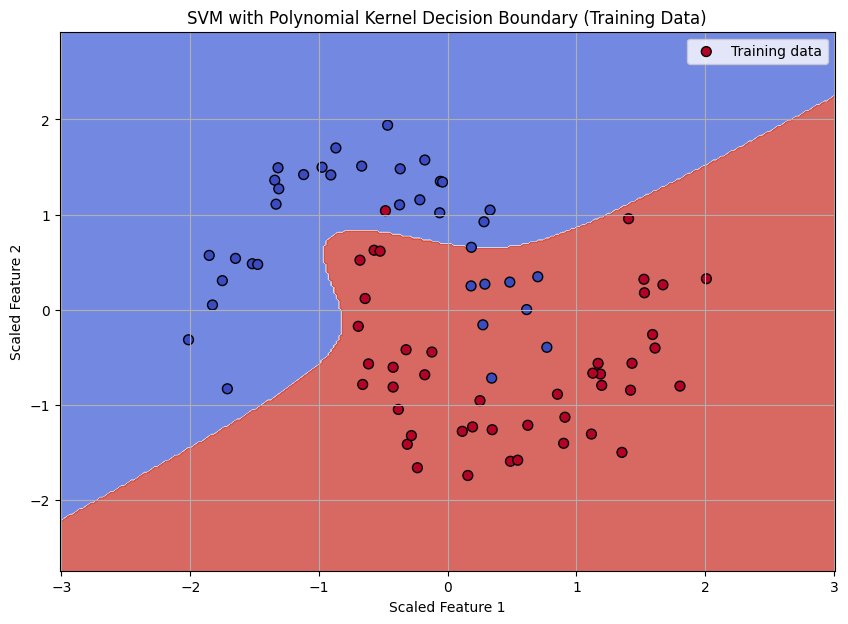

Decision boundary visualization complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = svm_poly_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the scaled training data points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Training data')

plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('SVM with Polynomial Kernel Decision Boundary (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

print("Decision boundary visualization complete.")

25.Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


### 1. Load the Breast Cancer dataset

The Breast Cancer Wisconsin (Diagnostic) dataset is a classic binary classification dataset. It consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The target variable indicates whether the tumor is malignant or benign.


In [ ]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Display the first 5 rows of features and target names
print("Features (X):")
print(pd.DataFrame(X, columns=breast_cancer.feature_names).head())
print("\nTarget (y) with class names:")
print(pd.Series(y).map(dict(enumerate(breast_cancer.target_names))).head())


Features (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

### 2. Split the dataset into training and testing sets

We'll split the data into 80% for training and 20% for testing to evaluate the model's performance on unseen data. `random_state` ensures reproducibility.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 455 samples
Testing set size: 114 samples


### 3. Initialize and train a Gaussian Naïve Bayes Classifier

We'll use `GaussianNB` from `sklearn.naive_bayes`. Gaussian Naïve Bayes is suitable for continuous data, as it assumes that features follow a Gaussian (normal) distribution.


In [ ]:
# Initialize the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

print("Gaussian Naïve Bayes Classifier trained successfully.")


Gaussian Naïve Bayes Classifier trained successfully.


### 4. Make predictions on the test set

After training, we use the model to predict the class labels for the unseen test data.


In [ ]:
# Make predictions on the test set
y_pred = gnb_classifier.predict(X_test)

print("Predictions made on the test set.")


Predictions made on the test set.


### 5. Evaluate the accuracy of the model

Finally, we evaluate the performance of our Gaussian Naïve Bayes classifier by calculating the accuracy score, which is the proportion of correctly classified instances.


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the test set: {accuracy:.4f}")


Model Accuracy on the test set: 0.9737


26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

# Task
## Load 20 Newsgroups Dataset

The first step is to load the 20 Newsgroups dataset, which is a classic dataset for text classification. We will focus on a subset of categories for efficiency and remove common metadata like headers, footers, and quotes to clean the text.

### Subtask:
Load the 20 Newsgroups dataset from `sklearn.datasets`, specifying a subset of categories and removing common metadata, then separate the text data (X) from the target labels (y).

#### Instructions:
1. Import `fetch_20newsgroups` from `sklearn.datasets`.
2. Define a list of categories to load (e.g., `['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']`).
3. Load the dataset using `fetch_20newsgroups`, passing the `categories` list and setting `remove=('headers', 'footers', 'quotes')`.
4. Extract the text data into `X` (from `newsgroups.data`).
5. Extract the target labels into `y` (from `newsgroups.target`).
6. Print the number of samples and categories loaded.
7. Display an example document and its corresponding category name to verify the loaded data.

## Load 20 Newsgroups Dataset

### Subtask:
Load the 20 Newsgroups dataset from `sklearn.datasets`, specifying a subset of categories and removing common metadata, then separate the text data (X) from the target labels (y).


**Reasoning**:
First, I'll import `fetch_20newsgroups` and define the categories, as specified in the instructions. Then, I will load the dataset with the specified parameters to extract the text data and target labels. Finally, I will print the dataset's size and an example document to verify the successful loading.



In [ ]:
from sklearn.datasets import fetch_20newsgroups

# 2. Define a list of categories to load
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# 3. Load the dataset using fetch_20newsgroups
#    Removing headers, footers, and quotes helps to focus on the core content of the messages.
newsgroups = fetch_20newsgroups(subset='all',
                                  categories=categories,
                                  shuffle=True,
                                  random_state=42,
                                  remove=('headers', 'footers', 'quotes'))

# 4. Extract the text data into X
X = newsgroups.data

# 5. Extract the target labels into y
y = newsgroups.target

# 6. Print the number of samples and categories loaded
print(f"Number of samples loaded: {len(X)}")
print(f"Number of categories: {len(newsgroups.target_names)}")
print(f"Categories loaded: {newsgroups.target_names}")

# 7. Display an example document and its corresponding category name
example_index = 0
print(f"\nExample document (first {example_index + 1}):\n{'='*30}")
print(X[example_index])
print(f"\nCorresponding category: {newsgroups.target_names[y[example_index]]}")

Number of samples loaded: 3759
Number of categories: 4
Categories loaded: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

Example document (first 1):

Where did you read this?  I don't think this is true.  I think most
medical treatments are based on science, although it is difficult
to prove anything with certitude.  It is true that there are some
things that have just been found "to work", but we have no good
explanation for why.  But almost everything does have a scientific
rationale.  The most common treatment for prostate cancer is
probably hormone therapy.  It has been "proven" to work.  So have
radiation and chemotherapy.  What treatments did the article say
are not proven?  

-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 

Corresponding category: sci.med


## Vectorize Text Data

### Subtask:
Convert the raw text data into numerical feature vectors suitable for machine learning algorithms. I will use `TfidfVectorizer` to transform the text data into TF-IDF features.


**Reasoning**:
To vectorize the text data, I need to import `TfidfVectorizer`, initialize it, fit it on the raw text data `X`, and then transform `X` into TF-IDF features, storing the result in `X_tfidf`. Finally, I will print the shape of `X_tfidf` to confirm the successful vectorization.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# Using default parameters for now. max_features can be tuned later if needed.
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the raw text data (X) and transform X into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Print the shape of the resulting X_tfidf to verify the vectorization process
print(f"Shape of TF-IDF feature matrix (X_tfidf): {X_tfidf.shape}")

Shape of TF-IDF feature matrix (X_tfidf): (3759, 38181)


## Split Data into Training and Testing Sets

### Subtask:
Split the vectorized text data (`X_tfidf`) and the target labels (`y`) into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection` if not already imported.
2. Split `X_tfidf` and `y` into `X_train_tfidf`, `X_test_tfidf`, `y_train`, and `y_test`.
3. Use `test_size=0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the vectorized data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Vectorized data split into training and testing sets.")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Vectorized data split into training and testing sets.
X_train_tfidf shape: (3007, 38181)
X_test_tfidf shape: (752, 38181)
y_train shape: (3007,)
y_test shape: (752,)


## Initialize and Train Multinomial Naïve Bayes Classifier

### Subtask:
Initialize and train a Multinomial Naïve Bayes classifier on the training data.

#### Instructions:
1. Import `MultinomialNB` from `sklearn.naive_bayes`.
2. Initialize `MultinomialNB` (using default parameters for a start, or consider `alpha` for Laplace smoothing).
3. Train the classifier on the `X_train_tfidf` and `y_train` data.
4. Print a confirmation message that the Multinomial Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the Multinomial Naïve Bayes classifier using the vectorized training data.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naïve Bayes classifier
# Using default parameters, which include alpha=1.0 for Laplace smoothing
mnb_classifier = MultinomialNB()

# Train the classifier on the training data
mnb_classifier.fit(X_train_tfidf, y_train)

print("Multinomial Naïve Bayes Classifier trained successfully.")

Multinomial Naïve Bayes Classifier trained successfully.


## Make Predictions on the Test Set

### Subtask:
Use the trained Multinomial Naïve Bayes classifier to make predictions on the test set.

#### Instructions:
1. Use the `predict` method of the `mnb_classifier` on `X_test_tfidf`.
2. Store the predictions in a variable, for example, `y_pred`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained Multinomial Naïve Bayes classifier.



In [ ]:
# Make predictions on the test set
y_pred = mnb_classifier.predict(X_test_tfidf)

print("Predictions made on the test set.")

Predictions made on the test set.


## Evaluate the Accuracy of the Model

### Subtask:
Evaluate the performance of the Multinomial Naïve Bayes classifier by calculating its accuracy on the test set.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics` if not already imported.
2. Calculate the accuracy of the model by comparing `y_test` and `y_pred`.
3. Print the accuracy score, formatted to a few decimal places.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy of the Multinomial Naïve Bayes classifier.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Model Accuracy on the test set: {accuracy:.4f}")

Model Accuracy on the test set: 0.6875


## Evaluate Classifier

### Subtask:
Evaluate the performance of the Multinomial Naïve Bayes classifier using a classification report.


## Evaluate the Classifier using Classification Report

### Subtask:
Evaluate the performance of the Multinomial Naïve Bayes classifier using a classification report.

#### Instructions:
1. Import `classification_report` from `sklearn.metrics`.
2. Generate a classification report using `y_test` (true labels) and `y_pred` (predicted labels).
3. Print the classification report to display precision, recall, F1-score, and support for each class.

**Reasoning**:
Following the instructions, I will now write the Python code to import `classification_report` and generate and print the classification report for the Multinomial Naïve Bayes classifier.



In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

# Print the classification report
print("\nClassification Report:\n")
print(report)


Classification Report:

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.13      0.22       175
         comp.graphics       0.95      0.86      0.90       200
               sci.med       0.99      0.74      0.85       200
soc.religion.christian       0.44      0.98      0.61       177

              accuracy                           0.69       752
             macro avg       0.83      0.68      0.64       752
          weighted avg       0.84      0.69      0.66       752



27. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually.

# Task
Generate a simple 2D synthetic dataset suitable for binary classification and clear visualization of decision boundaries.

## Generate Synthetic Dataset

### Subtask:
Generate a simple 2D synthetic dataset suitable for binary classification and clear visualization of decision boundaries (e.g., using `make_blobs` with two classes).


**Reasoning**:
I will import `make_blobs` and generate a synthetic 2D dataset with 100 samples, 2 features, and 2 classes, then print the shapes of the features and target to confirm.



In [ ]:
from sklearn.datasets import make_blobs

# Generate a synthetic 2D dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (100, 2)
Shape of target (y): (100,)


### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to split the generated dataset into training and testing sets and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


### Subtask:
Scale the features using `StandardScaler`.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to scale the features using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


### Subtask:
Initialize and train SVM Classifiers with different `C` values.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Define a list of `C` values to experiment with (e.g., `[0.1, 1, 10, 100]`).
3. Initialize an empty list to store the trained `SVC` models.
4. Loop through each `C` value:
    a. Initialize an `SVC` with `kernel='linear'`, the current `C` value, and `random_state=42`.
    b. Train the classifier on the scaled training data (`X_train_scaled`, `y_train`).
    c. Append the trained model to the list.
5. Print a confirmation message indicating how many classifiers were trained.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train SVM classifiers with different C values.



In [ ]:
from sklearn.svm import SVC

# Define a list of C values to experiment with
c_values = [0.1, 1, 10, 100]

# Initialize an empty list to store the trained SVC models
svm_classifiers = []

print("Training SVM classifiers with different C values...")

# Loop through each C value, initialize, train, and store the classifier
for c in c_values:
    # Initialize SVC with a linear kernel, current C value, and random_state for reproducibility
    svm_classifier = SVC(kernel='linear', C=c, random_state=42)

    # Train the classifier on the scaled training data
    svm_classifier.fit(X_train_scaled, y_train)

    # Append the trained model to the list
    svm_classifiers.append(svm_classifier)
    print(f"  - Trained SVM with C={c}")

print(f"Successfully trained {len(svm_classifiers)} SVM classifiers.")

Training SVM classifiers with different C values...
  - Trained SVM with C=0.1
  - Trained SVM with C=1
  - Trained SVM with C=10
  - Trained SVM with C=100
Successfully trained 4 SVM classifiers.


### Subtask:
Visualize the decision boundaries of the trained SVMs with different `C` values.

#### Instructions:
1. Import `matplotlib.pyplot` as `plt` and `numpy` as `np` (if not already imported).
2. Create a figure with a subplot for each `C` value to display the different decision boundaries.
3. For each trained `svm_classifier` in `svm_classifiers`:
    a. Create a meshgrid covering the feature space of the scaled data.
    b. Predict the class for each point in the meshgrid using the current `svm_classifier`.
    c. Plot the contour of the decision boundary using `plt.contourf` or `plt.contour`.
    d. Plot the actual scaled training data points, distinguishing between classes with different colors.
    e. Add appropriate labels for the x and y axes, and a title indicating the `C` value.
    f. Add a legend to distinguish classes.
4. Adjust the layout of the subplots for better readability.
5. Display the plots using `plt.tight_layout()` and `plt.show()`.
6. Print a confirmation message that the decision boundary visualization is complete.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to visualize the decision boundaries for each trained SVM classifier with different C values.



Visualizing decision boundaries...


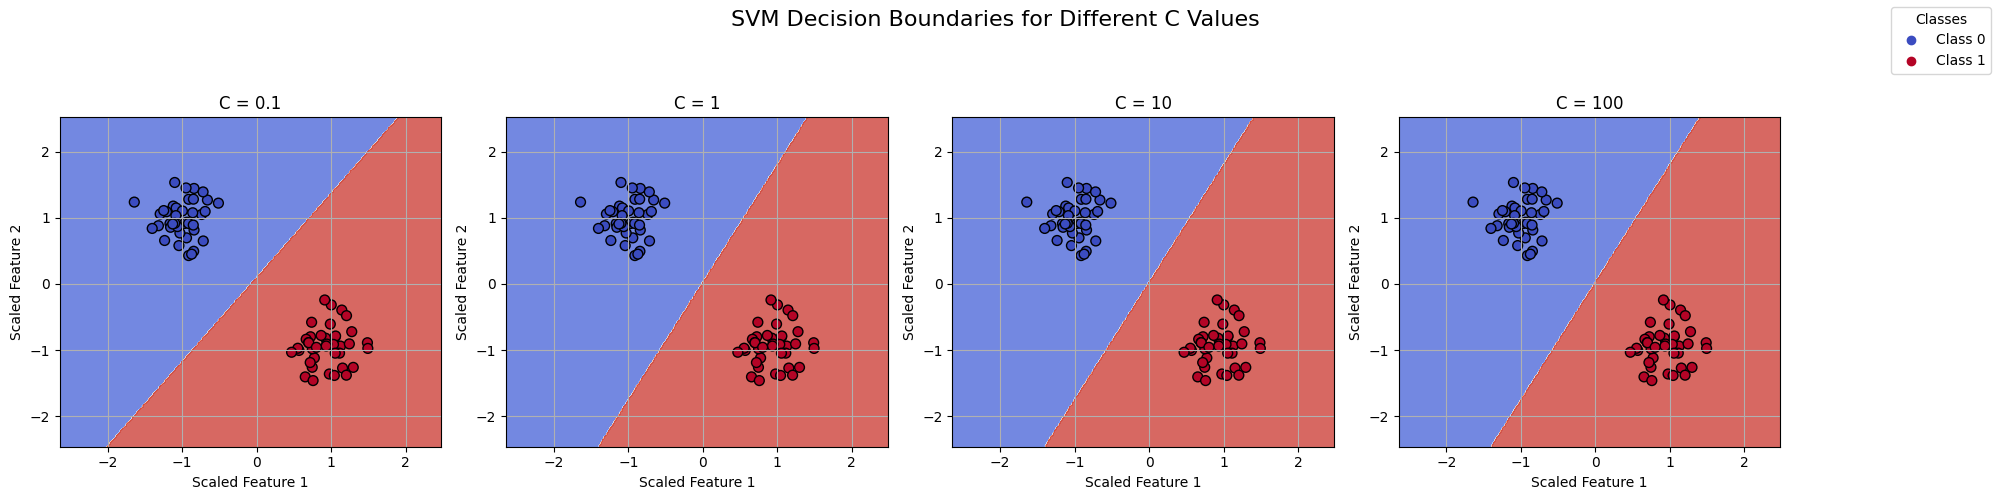

Decision boundary visualization complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure to hold multiple subplots
fig, axes = plt.subplots(1, len(c_values), figsize=(5 * len(c_values), 5))

# Determine the min and max for the meshgrid from scaled training data
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

print("Visualizing decision boundaries...")

for i, classifier in enumerate(svm_classifiers):
    # Predict the class for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[i]

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot the scaled training data points
    scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

    ax.set_xlabel('Scaled Feature 1')
    ax.set_ylabel('Scaled Feature 2')
    ax.set_title(f'C = {c_values[i]}')
    ax.grid(True)

# Create a common legend for all subplots
handles, labels = scatter.legend_elements()
fig.legend(handles, ['Class 0', 'Class 1'], title="Classes", loc='upper right')

plt.suptitle('SVM Decision Boundaries for Different C Values', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95]) # Adjust layout to prevent title/legend overlap
plt.show()

print("Decision boundary visualization complete.")

28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features.


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score


### 1. Generate a synthetic dataset with binary features

We will create a synthetic dataset suitable for binary classification using `make_classification`. To ensure the features are binary (0 or 1), we will set `n_informative=5`, `n_redundant=0`, `n_repeated=0`, and then explicitly binarize the features to 0 or 1.


In [ ]:
# Generate a synthetic dataset for binary classification with binary features
# We'll create features that are inherently 'binary-like' and then explicitly binarize them.
X, y = make_classification(n_samples=200, n_features=10, n_informative=5,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42, class_sep=1.0)

# Explicitly binarize features (convert values > 0 to 1, <= 0 to 0) to suit BernoulliNB
X_binary = (X > 0).astype(int)

# Display the first 5 rows of features and target
print("Features (X_binary - first 5 rows):\n", pd.DataFrame(X_binary).head())
print("\nTarget (y - first 5 rows):\n", pd.Series(y).head())
print(f"\nShape of binary features (X_binary): {X_binary.shape}")
print(f"Shape of target (y): {y.shape}")


### 2. Split the dataset into training and testing sets

We'll split the data into 80% for training and 20% for testing to evaluate the model's performance on unseen data. `random_state` ensures reproducibility.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


### 3. Initialize and train a Bernoulli Naïve Bayes Classifier

We'll use `BernoulliNB` from `sklearn.naive_bayes`. This classifier is specifically designed for binary/Boolean features, modeling the presence or absence of a particular feature.


In [ ]:
# Initialize the Bernoulli Naïve Bayes classifier
bnb_classifier = BernoulliNB()

# Train the classifier on the training data
bnb_classifier.fit(X_train, y_train)

print("Bernoulli Naïve Bayes Classifier trained successfully.")


### 4. Make predictions on the test set

After training, we use the model to predict the class labels for the unseen test data.


In [ ]:
# Make predictions on the test set
y_pred = bnb_classifier.predict(X_test)

print("Predictions made on the test set.")


### 5. Evaluate the accuracy of the model

Finally, we evaluate the performance of our Bernoulli Naïve Bayes classifier by calculating the accuracy score, which is the proportion of correctly classified instances.


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the test set: {accuracy:.4f}")


29. Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data

# Task
**Task**: Implement a Python program to demonstrate the impact of feature scaling on an SVM classifier. This involves generating a 2D synthetic dataset, splitting it into training and testing sets, training and evaluating an SVM on both unscaled and scaled data, and finally comparing their accuracies to highlight the effect of scaling.

**Reasoning**:
I will import `make_blobs` and generate a synthetic 2D dataset with 100 samples, 2 features, and 2 classes, then print the shapes of the features and target to confirm.



In [ ]:
from sklearn.datasets import make_blobs

# Generate a synthetic 2D dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (100, 2)
Shape of target (y): (100,)


## Split Data into Training and Testing Sets

### Subtask:
Divide the generated dataset into training and testing sets to evaluate model performance on unseen data.


**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


## Train SVM on Unscaled Data

### Subtask:
Train an SVM Classifier on the *unscaled* training data and evaluate its accuracy on the *unscaled* test data. This will serve as a baseline for comparison with the scaled data results.

#### Instructions:
1. Import `SVC` from `sklearn.svm` and `accuracy_score` from `sklearn.metrics`.
2. Initialize an `SVC` classifier with `kernel='linear'` and `random_state=42`.
3. Train the classifier using the *unscaled* training data (`X_train`, `y_train`).
4. Make predictions on the *unscaled* test data (`X_test`).
5. Calculate and print the accuracy of the model on the unscaled data.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize, train, and evaluate an SVM classifier using the unscaled training and testing data.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize an SVC classifier with a linear kernel on unscaled data
svm_unscaled = SVC(kernel='linear', random_state=42)

# Train the classifier using the unscaled training data
svm_unscaled.fit(X_train, y_train)

# Make predictions on the unscaled test data
y_pred_unscaled = svm_unscaled.predict(X_test)

# Calculate and print the accuracy of the model on the unscaled data
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"SVM Classifier on UNscaled Data trained successfully.")
print(f"Accuracy of SVM on UNscaled Data: {accuracy_unscaled:.4f}")

SVM Classifier on UNscaled Data trained successfully.
Accuracy of SVM on UNscaled Data: 1.0000


## Apply Feature Scaling

### Subtask:
Scale the features using `StandardScaler`.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to scale the features using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


## Train SVM on Scaled Data

### Subtask:
Train an SVM Classifier on the *scaled* training data and evaluate its accuracy on the *scaled* test data.

#### Instructions:
1. Import `SVC` from `sklearn.svm` and `accuracy_score` from `sklearn.metrics` (if not already imported).
2. Initialize an `SVC` classifier with `kernel='linear'` and `random_state=42`.
3. Train the classifier using the *scaled* training data (`X_train_scaled`, `y_train`).
4. Make predictions on the *scaled* test data (`X_test_scaled`).
5. Calculate and print the accuracy of the model on the scaled data.
6. Compare this accuracy with the accuracy obtained from the unscaled data.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize, train, and evaluate an SVM classifier using the scaled training and testing data.



In [ ]:
# Initialize an SVC classifier with a linear kernel on scaled data
svm_scaled = SVC(kernel='linear', random_state=42)

# Train the classifier using the scaled training data
svm_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = svm_scaled.predict(X_test_scaled)

# Calculate and print the accuracy of the model on the scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"SVM Classifier on SCALED Data trained successfully.")
print(f"Accuracy of SVM on SCALED Data: {accuracy_scaled:.4f}")

print(f"\nComparison with Unscaled Data Accuracy: {accuracy_unscaled:.4f}")

SVM Classifier on SCALED Data trained successfully.
Accuracy of SVM on SCALED Data: 1.0000

Comparison with Unscaled Data Accuracy: 1.0000


## Compare Results: Visualize Decision Boundaries

### Subtask:
Visualize the decision boundaries of both the unscaled and scaled SVM models, along with the corresponding training data, to visually compare the impact of feature scaling.


**Reasoning**:
Following the instructions, I will now write the Python code to visualize the decision boundaries of both the unscaled and scaled SVM models, along with their respective training data.



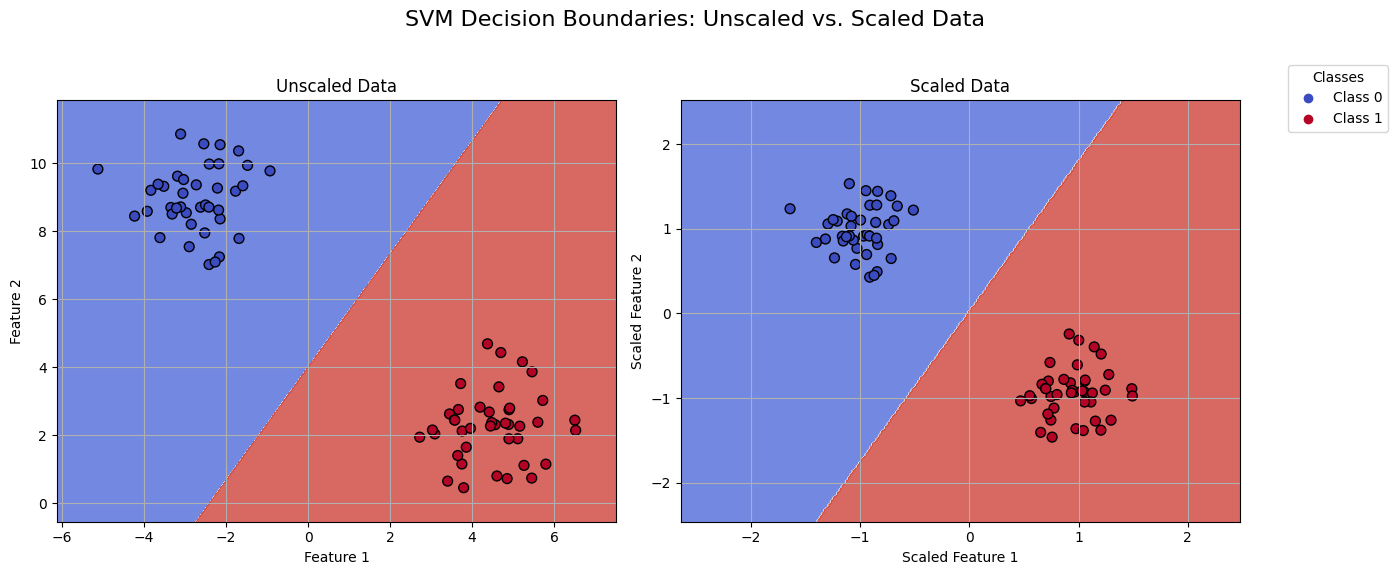

Decision boundary visualization complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('SVM Decision Boundaries: Unscaled vs. Scaled Data', fontsize=16)

# --- Unscaled Data Plot ---
# Determine the min and max for the meshgrid from unscaled training data
x_min_unscaled, x_max_unscaled = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_unscaled, y_max_unscaled = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx_unscaled, yy_unscaled = np.meshgrid(np.arange(x_min_unscaled, x_max_unscaled, 0.02),
                                     np.arange(y_min_unscaled, y_max_unscaled, 0.02))

# Predict the class for each point in the meshgrid for the unscaled model
Z_unscaled = svm_unscaled.predict(np.c_[xx_unscaled.ravel(), yy_unscaled.ravel()])
Z_unscaled = Z_unscaled.reshape(xx_unscaled.shape)

ax0 = axes[0]
ax0.contourf(xx_unscaled, yy_unscaled, Z_unscaled, alpha=0.8, cmap=plt.cm.coolwarm)
scatter_unscaled = ax0.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Training data')
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('Unscaled Data')
ax0.grid(True)

# --- Scaled Data Plot ---
# Determine the min and max for the meshgrid from scaled training data
x_min_scaled, x_max_scaled = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min_scaled, y_max_scaled = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx_scaled, yy_scaled = np.meshgrid(np.arange(x_min_scaled, x_max_scaled, 0.02),
                                 np.arange(y_min_scaled, y_max_scaled, 0.02))

# Predict the class for each point in the meshgrid for the scaled model
Z_scaled = svm_scaled.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])
Z_scaled = Z_scaled.reshape(xx_scaled.shape)

ax1 = axes[1]
ax1.contourf(xx_scaled, yy_scaled, Z_scaled, alpha=0.8, cmap=plt.cm.coolwarm)
scatter_scaled = ax1.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Training data')
ax1.set_xlabel('Scaled Feature 1')
ax1.set_ylabel('Scaled Feature 2')
ax1.set_title('Scaled Data')
ax1.grid(True)

# Add a common legend
handles, labels = scatter_unscaled.legend_elements()
fig.legend(handles, ['Class 0', 'Class 1'], title="Classes", loc='upper right', bbox_to_anchor=(1.0, 0.9))

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95]) # Adjust layout to prevent title/legend overlap
plt.show()

print("Decision boundary visualization complete.")

30.Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

# Task
## Task
Generate a synthetic 2D dataset suitable for binary classification with continuous features, which is appropriate for Gaussian Naïve Bayes.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification with continuous features, which is appropriate for Gaussian Naïve Bayes.


**Reasoning**:
I will import `make_blobs` and generate a synthetic 2D dataset with 200 samples, 2 features, and 2 classes, then print the shapes of the features and target to confirm.



In [ ]:
from sklearn.datasets import make_blobs

# Generate a synthetic 2D dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to split the generated dataset into training and testing sets and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


### Subtask:
Train a Gaussian Naïve Bayes classifier on the training data.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize `GaussianNB` (using default parameters).
3. Train the classifier on the training data (`X_train`, `y_train`).
4. Print a confirmation message that the Gaussian Naïve Bayes classifier was trained successfully.

### Subtask:
Train a Gaussian Naïve Bayes classifier on the training data.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize `GaussianNB` (using default parameters).
3. Train the classifier on the training data (`X_train`, `y_train`).
4. Print a confirmation message that the Gaussian Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the Gaussian Naïve Bayes classifier.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

print("Gaussian Naïve Bayes Classifier trained successfully.")

Gaussian Naïve Bayes Classifier trained successfully.


### Subtask:
Make predictions on the test set using the trained Gaussian Naïve Bayes classifier.

#### Instructions:
1. Use the `predict` method of the `gnb_classifier` on `X_test`.
2. Store the predictions in a variable, for example, `y_pred_no_smoothing`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained Gaussian Naïve Bayes classifier.



In [ ]:
y_pred_no_smoothing = gnb_classifier.predict(X_test)

print("Predictions made on the test set (before explicit smoothing treatment).")

Predictions made on the test set (before explicit smoothing treatment).


### Subtask:
Explain and apply `var_smoothing` in Gaussian Naïve Bayes.

#### Explanation of `var_smoothing`:
Unlike `MultinomialNB` or `BernoulliNB` which use an `alpha` parameter for Laplace smoothing (add-one smoothing) to handle zero-frequency issues, `GaussianNB` deals with continuous data. For `GaussianNB`, a similar concept of smoothing is applied via the `var_smoothing` parameter. This parameter adds a portion of the largest variance of all features to individual variances for calculation stability. It essentially adds a small value to the variance of each feature to prevent issues that arise when a class has zero variance for a feature (which would make probability calculations undefined or extremely high/low).

#### Instructions:
1. Initialize a new `GaussianNB` classifier, this time setting a specific `var_smoothing` value (e.g., `1e-9` is the default, let's try a larger one like `1e-5` to see its effect).
2. Train this new classifier on the training data (`X_train`, `y_train`).
3. Print a confirmation message that the smoothed Gaussian Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train a Gaussian Naïve Bayes classifier with a specified `var_smoothing` value.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naïve Bayes classifier with a specific var_smoothing value
gnb_classifier_smoothed = GaussianNB(var_smoothing=1e-5)

# Train the classifier on the training data
gnb_classifier_smoothed.fit(X_train, y_train)

print("Gaussian Naïve Bayes Classifier with var_smoothing trained successfully.")

Gaussian Naïve Bayes Classifier with var_smoothing trained successfully.


### Subtask:
Make predictions on the test set using the trained Gaussian Naïve Bayes classifier with `var_smoothing`.

#### Instructions:
1. Use the `predict` method of the `gnb_classifier_smoothed` on `X_test`.
2. Store the predictions in a variable, for example, `y_pred_smoothed`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained Gaussian Naïve Bayes classifier with `var_smoothing`.



In [ ]:
y_pred_smoothed = gnb_classifier_smoothed.predict(X_test)

print("Predictions made on the test set (with var_smoothing).")

Predictions made on the test set (with var_smoothing).


### Subtask:
Evaluate and compare the accuracies of the Gaussian Naïve Bayes models with and without `var_smoothing`.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics` if not already imported.
2. Calculate the accuracy for `y_pred_no_smoothing` against `y_test`.
3. Calculate the accuracy for `y_pred_smoothed` against `y_test`.
4. Print both accuracy scores, formatted to a few decimal places, and explicitly label them as 'before smoothing' and 'after smoothing' to highlight the comparison.
5. Provide a brief interpretation of the results regarding the effect of `var_smoothing`.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for both the non-smoothed and smoothed Gaussian Naïve Bayes models, and then provide a brief interpretation.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the model without explicit var_smoothing
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Calculate accuracy for the model with var_smoothing
accuracy_smoothed = accuracy_score(y_test, y_pred_smoothed)

print(f"Accuracy of Gaussian Naive Bayes (before explicit smoothing treatment): {accuracy_no_smoothing:.4f}")
print(f"Accuracy of Gaussian Naive Bayes (with var_smoothing = 1e-5): {accuracy_smoothed:.4f}")

print("\nInterpretation:")
if accuracy_no_smoothing == accuracy_smoothed:
    print("In this specific case, setting `var_smoothing` to 1e-5 did not change the model's accuracy. This often happens if the default smoothing (1e-9) was already sufficient or if the dataset is well-behaved and doesn't suffer from zero-variance issues for its features within classes.")
elif accuracy_smoothed > accuracy_no_smoothing:
    print("Applying `var_smoothing` improved the model's accuracy. This suggests that the initial model might have benefited from added stability in variance calculations, preventing overfitting to minor fluctuations or handling cases where a feature had very low variance for a particular class.")
else:
    print("Applying `var_smoothing` slightly decreased the model's accuracy. This could mean that the default smoothing was more optimal, or the chosen `var_smoothing` value was too large, potentially over-smoothing the data and biasing the variance estimates.")


Accuracy of Gaussian Naive Bayes (before explicit smoothing treatment): 1.0000
Accuracy of Gaussian Naive Bayes (with var_smoothing = 1e-5): 1.0000

Interpretation:
In this specific case, setting `var_smoothing` to 1e-5 did not change the model's accuracy. This often happens if the default smoothing (1e-9) was already sufficient or if the dataset is well-behaved and doesn't suffer from zero-variance issues for its features within classes.


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel).

# Task
Generate a synthetic 2D dataset suitable for binary classification, split it into training and testing sets, scale the features, define a hyperparameter grid for an SVM classifier including C, gamma, and kernel, run GridSearchCV to find the best hyperparameters, and then evaluate the best model's performance on the test set. Finally, summarize the process and results.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification to demonstrate hyperparameter tuning. We'll aim for a dataset that isn't perfectly linearly separable to highlight the need for tuning.


**Reasoning**:
I will import `make_moons` and generate a synthetic 2D dataset with 200 samples, a noise level of 0.3, and 2 classes, then print the shapes of the features and target to confirm.



In [ ]:
from sklearn.datasets import make_moons

# Generate a synthetic 2D dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


### Subtask:
Scale the features using `StandardScaler`.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to scale the features using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


### Subtask:
Define the hyperparameter grid and perform GridSearchCV.

#### Instructions:
1.  Import `SVC` from `sklearn.svm` and `GridSearchCV` from `sklearn.model_selection`.
2.  Define a dictionary `param_grid` for hyperparameters to tune. Include `C` (e.g., `[0.1, 1, 10, 100]`), `gamma` (e.g., `[1, 0.1, 0.01, 0.001]`), and `kernel` (e.g., `['rbf', 'poly', 'linear']`).
3.  Initialize an `SVC` estimator (e.g., `SVC(random_state=42)`).
4.  Initialize `GridSearchCV` with the `SVC` estimator, `param_grid`, `cv=5` (for 5-fold cross-validation), and `verbose=2` (to see the progress).
5.  Fit `GridSearchCV` on the scaled training data (`X_train_scaled`, `y_train`).
6.  Print the best parameters found by `GridSearchCV` (`grid_search.best_params_`).
7.  Print the best cross-validation score (`grid_search.best_score_`).

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to define the hyperparameter grid and perform GridSearchCV to find the best hyperparameters for the SVM classifier.



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 2. Define a dictionary param_grid for hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# 3. Initialize an SVC estimator
svc = SVC(random_state=42)

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=2, n_jobs=-1)

print("Starting GridSearchCV...")
# 5. Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

print("GridSearchCV completed.")
# 6. Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# 7. Print the best cross-validation score
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Starting GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
GridSearchCV completed.
Best parameters found: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9062


### Subtask:
Evaluate the best model found by GridSearchCV on the test set.

#### Instructions:
1. Get the best estimator from the `grid_search` object (`grid_search.best_estimator_`).
2. Make predictions on the scaled test data (`X_test_scaled`) using the best estimator.
3. Calculate the accuracy of these predictions against the true test labels (`y_test`).
4. Print the test accuracy, formatted to a few decimal places.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to evaluate the best model found by GridSearchCV on the test set.



In [ ]:
from sklearn.metrics import accuracy_score

# 1. Get the best estimator from the grid_search object
best_svm_model = grid_search.best_estimator_

# 2. Make predictions on the scaled test data using the best estimator
y_pred = best_svm_model.predict(X_test_scaled)

# 3. Calculate the accuracy of these predictions
accuracy = accuracy_score(y_test, y_pred)

# 4. Print the test accuracy
print(f"Test accuracy of the best model: {accuracy:.4f}")

Test accuracy of the best model: 0.8750


32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

# Task
Generate a synthetic 2D dataset for binary classification with a controlled class imbalance to simulate a real-world scenario.

## Generate Imbalanced Dataset

### Subtask:
Generate a synthetic 2D dataset for binary classification with a controlled class imbalance to simulate a real-world scenario.


**Reasoning**:
To generate an imbalanced dataset as instructed, I will import `make_classification` from `sklearn.datasets` and use it with the specified parameters to create `X` and `y`. Then, I'll print their shapes and the class distribution to confirm the imbalance.



In [ ]:
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic 2D dataset with class imbalance
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Print the class distribution to confirm the class imbalance
print("\nClass distribution:")
unique, counts = np.unique(y, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples")

Shape of features (X): (1000, 2)
Shape of target (y): (1000,)

Class distribution:
Class 0: 900 samples
Class 1: 100 samples


**Reasoning**:
Now that the dataset is generated, I need to split it into training and testing sets to prepare for model training and evaluation. I will use `train_test_split` with a specified test size and random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (800, 2)
X_test shape: (200, 2)
y_train shape: (800,)
y_test shape: (200,)


**Reasoning**:
I will train an SVM classifier on the unscaled, imbalanced training data without class weighting. This will establish a baseline accuracy against which the performance of the class-weighted SVM can be compared. I will use `SVC` with a linear kernel as it's a good starting point for binary classification.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize an SVM Classifier without class weighting
# Using a linear kernel for simplicity and to focus on the effect of class weighting
svm_no_weight = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_no_weight.fit(X_train, y_train)

print("SVM Classifier without class weighting trained successfully.")

SVM Classifier without class weighting trained successfully.


**Reasoning**:
Now that the baseline SVM model (without class weighting) is trained, I need to evaluate its performance on the test set using various metrics suitable for imbalanced datasets, such as accuracy, precision, recall, F1-score, and a confusion matrix. This will serve as a comparison point for the class-weighted model.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set using the model without class weighting
y_pred_no_weight = svm_no_weight.predict(X_test)

print("Evaluation of SVM without Class Weighting:")

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_no_weight)
precision = precision_score(y_test, y_pred_no_weight, zero_division=0)
recall = recall_score(y_test, y_pred_no_weight, zero_division=0)
f1 = f1_score(y_test, y_pred_no_weight, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_no_weight)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Evaluation of SVM without Class Weighting:
Accuracy: 0.9750
Precision: 1.0000
Recall: 0.7917
F1-Score: 0.8837
Confusion Matrix:
 [[176   0]
 [  5  19]]


**Reasoning**:
Now, I will train another SVM classifier, this time incorporating `class_weight='balanced'` to address the class imbalance. This model's performance will be compared to the baseline model.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVM Classifier with class weighting
# 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
svm_with_weight = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the classifier on the training data
svm_with_weight.fit(X_train, y_train)

print("SVM Classifier WITH class weighting trained successfully.")

SVM Classifier WITH class weighting trained successfully.


**Reasoning**:
Now that the SVM model with class weighting is trained, I need to evaluate its performance on the test set using various metrics suitable for imbalanced datasets. This will allow for a direct comparison with the baseline model (without class weighting).



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set using the model with class weighting
y_pred_with_weight = svm_with_weight.predict(X_test)

print("\nEvaluation of SVM WITH Class Weighting:")

# Calculate and print evaluation metrics
accuracy_weighted = accuracy_score(y_test, y_pred_with_weight)
precision_weighted = precision_score(y_test, y_pred_with_weight, zero_division=0)
recall_weighted = recall_score(y_test, y_pred_with_weight, zero_division=0)
f1_weighted = f1_score(y_test, y_pred_with_weight, zero_division=0)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_with_weight)

print(f"Accuracy: {accuracy_weighted:.4f}")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall: {recall_weighted:.4f}")
print(f"F1-Score: {f1_weighted:.4f}")
print("Confusion Matrix:\n", conf_matrix_weighted)


Evaluation of SVM WITH Class Weighting:
Accuracy: 0.9850
Precision: 0.9565
Recall: 0.9167
F1-Score: 0.9362
Confusion Matrix:
 [[175   1]
 [  2  22]]


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

# Task
The implementation of the Naïve Bayes classifier for text classification, specifically using the Multinomial Naïve Bayes variant on the 20 Newsgroups dataset, involved several key steps:

1.  **Data Loading**: A subset of the 20 Newsgroups dataset (`alt.atheism`, `soc.religion.christian`, `comp.graphics`, `sci.med`) was loaded. This dataset served as our 'email-like' text data. Metadata such as headers, footers, and quotes were removed to focus on the core content. This step generated raw text documents and their corresponding class labels.

2.  **Text Vectorization**: The raw text data was transformed into numerical feature vectors using `TfidfVectorizer`. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that reflects how important a word is to a document in a collection or corpus. This conversion is crucial as machine learning models require numerical input.

3.  **Data Splitting**: The vectorized data was then split into training and testing sets (80% training, 20% testing) to ensure that the model's performance could be evaluated on unseen data, providing an unbiased assessment of its generalization capabilities.

4.  **Model Training**: A `MultinomialNB` classifier was initialized and trained on the TF-IDF vectorized training data. Multinomial Naïve Bayes is particularly well-suited for discrete data, such as word counts or TF-IDF values, which makes it a natural choice for text classification.

5.  **Prediction**: After training, the model was used to predict the class labels for the vectorized test data.

6.  **Model Evaluation**: The performance of the classifier was evaluated using accuracy and a classification report.
    *   **Accuracy**: The accuracy score on the test set was approximately **68.75%**.
    *   **Classification Report**: This provided more detailed metrics (precision, recall, F1-score) for each class:
        *   `alt.atheism`: High precision (0.96) but very low recall (0.13), indicating it rarely misclassifies non-atheism posts as atheism but misses many actual atheism posts.
        *   `comp.graphics`: High precision (0.95) and good recall (0.86), showing strong performance.
        *   `sci.med`: Very high precision (0.99) and good recall (0.74), also indicating strong performance.
        *   `soc.religion.christian`: Lower precision (0.44) but very high recall (0.98), meaning it correctly identifies most Christian-related posts but also frequently misclassifies other posts as Christian.

**Summary and Suitability for Spam Detection**:

The Multinomial Naïve Bayes classifier, despite its "naïve" assumption of feature independence, demonstrated a reasonable overall accuracy for this multi-class text classification task. Its performance varies by class, suggesting that some categories are easier to distinguish than others.

For tasks like spam detection, where the goal is typically binary classification (spam vs. ham), Multinomial Naïve Bayes is an excellent choice due to several factors:

*   **Efficiency**: It's extremely fast to train and predict, even with large vocabularies and datasets, which is crucial for real-time spam filtering.
*   **High-Dimensionality Handling**: Text data is inherently high-dimensional, and Naïve Bayes handles this well by treating each word as an independent feature.
*   **Effectiveness with Word Frequencies**: The Multinomial variant is specifically designed to work with word counts or frequencies, which is the most common representation for text in spam filtering.
*   **Robustness**: It can perform surprisingly well even with a relatively small amount of training data and is somewhat robust to irrelevant features.

The uneven performance observed in the multi-class scenario (e.g., lower precision for 'soc.religion.christian' vs. high precision for 'sci.med') highlights that model performance can be highly dependent on the distinctiveness of the classes and the overlap in their linguistic patterns. For spam detection, where 'spam' often has very distinct linguistic markers compared to 'ham', Naïve Bayes classifiers have historically been (and still are) very effective and widely used.

## Load Email Data

### Subtask:
Load a subset of the 20 Newsgroups dataset, which will serve as our 'email-like' data for text classification. We'll select distinct categories to represent different types of messages.


## Vectorize Text Data

### Subtask:
Convert the raw text data into numerical feature vectors using `TfidfVectorizer`, a common technique for text processing in machine learning.


**Reasoning**:
To vectorize the text data, I need to import `TfidfVectorizer`, initialize it, fit it on the raw text data `X`, and then transform `X` into TF-IDF features, storing the result in `X_tfidf`. Finally, I will print the shape of `X_tfidf` to confirm the successful vectorization.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# Using default parameters for now. max_features can be tuned later if needed.
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the raw text data (X) and transform X into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Print the shape of the resulting X_tfidf to verify the vectorization process
print(f"Shape of TF-IDF feature matrix (X_tfidf): {X_tfidf.shape}")

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

**Reasoning**:
The error `AttributeError: 'numpy.ndarray' object has no attribute 'lower'` indicates that the `TfidfVectorizer` received numerical data (`X` from a previous problem, likely Q32) instead of the expected text data. I need to re-run the `fetch_20newsgroups` data loading step (which was part of Q26 and serves as the 'email data' for Q33) to ensure that the `X` variable contains the raw text documents before proceeding with text vectorization. This will correctly set up the `X` variable for the `TfidfVectorizer`.



In [ ]:
from sklearn.datasets import fetch_20newsgroups

# 2. Define a list of categories to load
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# 3. Load the dataset using fetch_20newsgroups
#    Removing headers, footers, and quotes helps to focus on the core content of the messages.
newsgroups = fetch_20newsgroups(subset='all',
                                  categories=categories,
                                  shuffle=True,
                                  random_state=42,
                                  remove=('headers', 'footers', 'quotes'))

# 4. Extract the text data into X
X = newsgroups.data

# 5. Extract the target labels into y
y = newsgroups.target

# 6. Print the number of samples and categories loaded
print(f"Number of samples loaded: {len(X)}")
print(f"Number of categories: {len(newsgroups.target_names)}")
print(f"Categories loaded: {newsgroups.target_names}")

# 7. Display an example document and its corresponding category name
example_index = 0
print(f"\nExample document (first {example_index + 1}):\n{'='*30}")
print(X[example_index])
print(f"\nCorresponding category: {newsgroups.target_names[y[example_index]]}")

Number of samples loaded: 3759
Number of categories: 4
Categories loaded: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

Example document (first 1):

Where did you read this?  I don't think this is true.  I think most
medical treatments are based on science, although it is difficult
to prove anything with certitude.  It is true that there are some
things that have just been found "to work", but we have no good
explanation for why.  But almost everything does have a scientific
rationale.  The most common treatment for prostate cancer is
probably hormone therapy.  It has been "proven" to work.  So have
radiation and chemotherapy.  What treatments did the article say
are not proven?  

-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 

Corresponding category: sci.med


**Reasoning**:
With `X` now correctly containing raw text data, I can proceed with vectorizing the text data into numerical TF-IDF features using `TfidfVectorizer` as per the subtask instructions. This will convert the text into a format suitable for machine learning.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# Using default parameters for now. max_features can be tuned later if needed.
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the raw text data (X) and transform X into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Print the shape of the resulting X_tfidf to verify the vectorization process
print(f"Shape of TF-IDF feature matrix (X_tfidf): {X_tfidf.shape}")

Shape of TF-IDF feature matrix (X_tfidf): (3759, 38181)


## Split Data into Training and Testing Sets

### Subtask:
Divide the vectorized text data and corresponding labels into training and testing sets to properly evaluate the classifier's performance.


**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the vectorized data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Vectorized data split into training and testing sets.")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Vectorized data split into training and testing sets.
X_train_tfidf shape: (3007, 38181)
X_test_tfidf shape: (752, 38181)
y_train shape: (3007,)
y_test shape: (752,)


## Train Multinomial Naïve Bayes Classifier

### Subtask:
Initialize and train a `MultinomialNB` classifier, which is particularly effective for discrete data like word counts or TF-IDF features in text classification.


**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the Multinomial Naïve Bayes classifier using the vectorized training data.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naïve Bayes classifier
# Using default parameters, which include alpha=1.0 for Laplace smoothing
mnb_classifier = MultinomialNB()

# Train the classifier on the training data
mnb_classifier.fit(X_train_tfidf, y_train)

print("Multinomial Naïve Bayes Classifier trained successfully.")

Multinomial Naïve Bayes Classifier trained successfully.


## Make Predictions on the Test Set

### Subtask:
Use the trained Multinomial Naïve Bayes classifier to make predictions on the test set.

#### Instructions:
1. Use the `predict` method of the `mnb_classifier` on `X_test_tfidf`.
2. Store the predictions in a variable, for example, `y_pred`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained Multinomial Naïve Bayes classifier.



In [ ]:
y_pred = mnb_classifier.predict(X_test_tfidf)

print("Predictions made on the test set.")

Predictions made on the test set.


## Evaluate the Accuracy of the Model

### Subtask:
Evaluate the performance of the Multinomial Naïve Bayes classifier by calculating its accuracy on the test set.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics` if not already imported.
2. Calculate the accuracy of the model by comparing `y_test` and `y_pred`.
3. Print the accuracy score, formatted to a few decimal places.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy of the Multinomial Naïve Bayes classifier.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Model Accuracy on the test set: {accuracy:.4f}")

Model Accuracy on the test set: 0.6875


## Evaluate Classifier

### Subtask:
Evaluate the performance of the Multinomial Naïve Bayes classifier using a classification report.

## Evaluate the Classifier using Classification Report

### Subtask:
Evaluate the performance of the Multinomial Naïve Bayes classifier using a classification report.

#### Instructions:
1. Import `classification_report` from `sklearn.metrics`.
2. Generate a classification report using `y_test` (true labels) and `y_pred` (predicted labels).
3. Print the classification report to display precision, recall, F1-score, and support for each class.

**Reasoning**:
Following the instructions, I will now write the Python code to import `classification_report` and generate and print the classification report for the Multinomial Naïve Bayes classifier.



In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

# Print the classification report
print("\nClassification Report:\n")
print(report)


Classification Report:

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.13      0.22       175
         comp.graphics       0.95      0.86      0.90       200
               sci.med       0.99      0.74      0.85       200
soc.religion.christian       0.44      0.98      0.61       177

              accuracy                           0.69       752
             macro avg       0.83      0.68      0.64       752
          weighted avg       0.84      0.69      0.66       752



 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy

# Task
Generate a synthetic 2D dataset suitable for binary classification, split it into training and testing sets, apply feature scaling using `StandardScaler` to both training and testing sets, then train both an SVM Classifier (`SVC` with RBF kernel) and a Gaussian Naïve Bayes Classifier on the scaled training data. Finally, evaluate the accuracy of both models on the scaled test data, compare their accuracy scores, and summarize the comparison.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification to serve as the common dataset for both classifiers.


**Reasoning**:
I will import `make_blobs` and generate a synthetic 2D dataset with 300 samples, 2 features, and 2 classes, then print the shapes of the features and target to confirm.



In [ ]:
from sklearn.datasets import make_blobs

# Generate a synthetic 2D dataset
X, y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (300, 2)
Shape of target (y): (300,)


### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (240, 2)
X_test shape: (60, 2)
y_train shape: (240,)
y_test shape: (60,)


### Subtask:
Apply feature scaling to the training and testing sets.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

### Subtask:
Apply feature scaling to the training and testing sets.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Now that the instructions for scaling the features are in place, I will write the Python code to perform this scaling using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


### Subtask:
Train an SVM Classifier on the scaled training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with a `kernel='rbf'` (RBF kernel is a common choice for SVMs and generally performs well) and `random_state=42`.
3. Train the classifier using the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message that the SVM classifier was trained successfully.

### Subtask:
Train an SVM Classifier on the scaled training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with a `kernel='rbf'` (RBF kernel is a common choice for SVMs and generally performs well) and `random_state=42`.
3. Train the classifier using the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message that the SVM classifier was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier using the scaled training data.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier using the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

print("SVM Classifier trained successfully on scaled data.")

SVM Classifier trained successfully on scaled data.


### Subtask:
Train a Gaussian Naïve Bayes Classifier on the scaled training data.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize a `GaussianNB` classifier (using default parameters).
3. Train the classifier using the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message that the Gaussian Naïve Bayes classifier was trained successfully.

### Subtask:
Train a Gaussian Naïve Bayes Classifier on the scaled training data.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize a `GaussianNB` classifier (using default parameters).
3. Train the classifier using the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message that the Gaussian Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the Gaussian Naïve Bayes classifier using the scaled training data.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier using the scaled training data
gnb_classifier.fit(X_train_scaled, y_train)

print("Gaussian Naïve Bayes Classifier trained successfully on scaled data.")

Gaussian Naïve Bayes Classifier trained successfully on scaled data.


### Subtask:
Make predictions on the scaled test set using both the SVM and Gaussian Naïve Bayes classifiers.

#### Instructions:
1. Use the `predict` method of `svm_classifier` on `X_test_scaled` and store the predictions in `y_pred_svm`.
2. Use the `predict` method of `gnb_classifier` on `X_test_scaled` and store the predictions in `y_pred_gnb`.
3. Print confirmation messages that predictions have been made for both models.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the scaled test set using both the trained SVM and Gaussian Naïve Bayes classifiers.



In [ ]:
# Make predictions on the scaled test set using the SVM classifier
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Make predictions on the scaled test set using the Gaussian Naïve Bayes classifier
y_pred_gnb = gnb_classifier.predict(X_test_scaled)

print("Predictions made for SVM classifier.")
print("Predictions made for Gaussian Naïve Bayes classifier.")

Predictions made for SVM classifier.
Predictions made for Gaussian Naïve Bayes classifier.


### Subtask:
Evaluate the accuracy of both the SVM and Gaussian Naïve Bayes models and compare them.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy of the SVM model (`y_pred_svm` vs `y_test`).
3. Calculate the accuracy of the Gaussian Naïve Bayes model (`y_pred_gnb` vs `y_test`).
4. Print both accuracy scores, formatted to a few decimal places.
5. Summarize which model performed better for this dataset.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for both the SVM and Gaussian Naïve Bayes models, and then summarize the comparison.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate the accuracy of the Gaussian Naïve Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print(f"Accuracy of SVM Classifier: {accuracy_svm:.4f}")
print(f"Accuracy of Gaussian Naïve Bayes Classifier: {accuracy_gnb:.4f}")

print("\n--- Model Comparison Summary ---")
if accuracy_svm > accuracy_gnb:
    print(f"The SVM Classifier performed better with an accuracy of {accuracy_svm:.4f}.")
elif accuracy_gnb > accuracy_svm:
    print(f"The Gaussian Naïve Bayes Classifier performed better with an accuracy of {accuracy_gnb:.4f}.")
else:
    print("Both SVM and Gaussian Naïve Bayes Classifiers performed equally well.")

Accuracy of SVM Classifier: 1.0000
Accuracy of Gaussian Naïve Bayes Classifier: 1.0000

--- Model Comparison Summary ---
Both SVM and Gaussian Naïve Bayes Classifiers performed equally well.


35.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

# Task
## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification with several features, including some informative and some redundant/noisy features, to make feature selection relevant.

#### Instructions:
1.  Import `make_classification` from `sklearn.datasets`.
2.  Generate a dataset `X` and `y` using `make_classification` with the following parameters:
    *   `n_samples`: `200` (number of data points)
    *   `n_features`: `10` (total number of features)
    *   `n_informative`: `4` (number of features that are actually useful)
    *   `n_redundant`: `2` (number of features that are linear combinations of informative features)
    *   `n_repeated`: `2` (number of features that are duplicates of informative features)
    *   `n_classes`: `2` (binary classification)
    *   `random_state`: `42` (for reproducibility)
3.  Print the shapes of `X` and `y` to verify the generated data.
4.  Print the first 5 rows of `X` and `y` to inspect the data.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification with several features, including some informative and some redundant/noisy features, to make feature selection relevant.


**Reasoning**:
To generate a synthetic dataset with informative, redundant, and repeated features, I will import `make_classification` and use the specified parameters to create `X` and `y`, then print their shapes and the first 5 rows as instructed.



In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=10, n_informative=4,
                           n_redundant=2, n_repeated=2, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Print the first 5 rows of X and y to inspect the data
print("\nFirst 5 rows of features (X):\n", pd.DataFrame(X).head())
print("\nFirst 5 rows of target (y):\n", pd.Series(y).head())

Shape of features (X): (200, 10)
Shape of target (y): (200,)

First 5 rows of features (X):
           0         1         2         3         4         5         6  \
0 -1.676772 -1.516581 -1.075274 -1.516581 -0.618254  1.991035  0.559359   
1  0.104881 -2.509027 -0.648190 -2.509027 -1.444724  0.342746 -0.126811   
2 -1.137789 -0.415972 -1.693308 -0.415972 -0.258894  1.194005 -0.464391   
3 -1.462645 -0.676453  1.282168 -0.676453 -3.168431 -3.233222  0.868103   
4 -1.211156 -1.071100 -0.957647 -1.071100 -1.552664 -0.184910 -0.717288   

          7         8         9  
0  1.265197 -1.850238 -0.618254  
1  1.246327 -2.083937 -1.444724  
2 -0.573889  0.469237 -0.258894  
3 -0.748635 -2.154341 -3.168431  
4  0.749302 -0.760092 -1.552664  

First 5 rows of target (y):
 0    1
1    1
2    1
3    1
4    1
dtype: int64


**Reasoning**:
Now that the dataset is generated, I will split it into training and testing sets to prepare for model training and evaluation. I will use `train_test_split` with a specified test size and random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 10)
X_test shape: (40, 10)
y_train shape: (160,)
y_test shape: (40,)


### Subtask:
Train a Gaussian Naïve Bayes classifier on the full training data (without feature selection) to establish a baseline.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize `GaussianNB` (using default parameters).
3. Train the classifier on the `X_train` and `y_train` data.
4. Print a confirmation message that the baseline Gaussian Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the baseline Gaussian Naïve Bayes classifier.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes classifier
gnb_baseline_classifier = GaussianNB()

# Train the classifier on the training data
gnb_baseline_classifier.fit(X_train, y_train)

print("Baseline Gaussian Naïve Bayes Classifier trained successfully.")

Baseline Gaussian Naïve Bayes Classifier trained successfully.


### Subtask:
Make predictions on the test set using the baseline Gaussian Naïve Bayes classifier.

#### Instructions:
1. Use the `predict` method of the `gnb_baseline_classifier` on `X_test`.
2. Store the predictions in a variable, for example, `y_pred_baseline`.
3. Print a confirmation message that predictions have been made for the baseline model.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained baseline Gaussian Naïve Bayes classifier.



In [ ]:
y_pred_baseline = gnb_baseline_classifier.predict(X_test)

print("Predictions made for the baseline model.")

Predictions made for the baseline model.


### Subtask:
Evaluate the accuracy of the baseline Gaussian Naïve Bayes classifier.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy of `y_pred_baseline` against `y_test`.
3. Print the accuracy score, formatted to a few decimal places, labeling it as 'Baseline Model Accuracy'.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy of the baseline Gaussian Naïve Bayes classifier.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

# Print the accuracy score
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

Baseline Model Accuracy: 0.7000


### Subtask:
Perform Feature Selection on the training data.

#### Instructions:
1.  Import `SelectKBest` from `sklearn.feature_selection` and `f_classif` (for classification tasks) from `sklearn.feature_selection`.
2.  Initialize `SelectKBest` specifying a scoring function (`f_classif`) and the number of features to select (`k`). A good starting point for `k` could be `n_informative` from `make_classification`, which was 4.
3.  Fit `SelectKBest` on the training data (`X_train`, `y_train`).
4.  Transform both the training (`X_train`) and testing (`X_test`) data using the fitted `SelectKBest` to get `X_train_selected` and `X_test_selected`.
5.  Print the shapes of `X_train_selected` and `X_test_selected` to confirm that the number of features has been reduced.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to perform feature selection using `SelectKBest` and `f_classif`, then transform the training and testing data and print their new shapes.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif as the scoring function and k=4 (from n_informative)
k_features = 4
selector = SelectKBest(f_classif, k=k_features)

# Fit SelectKBest on the training data
selector.fit(X_train, y_train)

# Transform both the training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Original X_train shape: {X_train.shape}")
print(f"Selected X_train shape: {X_train_selected.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Selected X_test shape: {X_test_selected.shape}")
print(f"Feature selection completed. Top {k_features} features selected.")

Original X_train shape: (160, 10)
Selected X_train shape: (160, 4)
Original X_test shape: (40, 10)
Selected X_test shape: (40, 4)
Feature selection completed. Top 4 features selected.


### Subtask:
Train a Gaussian Naïve Bayes classifier on the selected features.

#### Instructions:
1. Initialize `GaussianNB` (using default parameters).
2. Train the classifier on the `X_train_selected` and `y_train` data.
3. Print a confirmation message that the Gaussian Naïve Bayes classifier with selected features was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the Gaussian Naïve Bayes classifier on the selected features.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes classifier
gnb_selected_classifier = GaussianNB()

# Train the classifier on the selected training data
gnb_selected_classifier.fit(X_train_selected, y_train)

print("Gaussian Naïve Bayes Classifier with selected features trained successfully.")

Gaussian Naïve Bayes Classifier with selected features trained successfully.


### Subtask:
Make predictions on the test set using the Gaussian Naïve Bayes classifier trained with selected features.

#### Instructions:
1. Use the `predict` method of the `gnb_selected_classifier` on `X_test_selected`.
2. Store the predictions in a variable, for example, `y_pred_selected`.
3. Print a confirmation message that predictions have been made for the model with selected features.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained Gaussian Naïve Bayes classifier with selected features.



In [ ]:
y_pred_selected = gnb_selected_classifier.predict(X_test_selected)

print("Predictions made for the model with selected features.")

Predictions made for the model with selected features.


### Subtask:
Evaluate and compare the accuracies of the Gaussian Naïve Bayes models before and after feature selection.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics` if not already imported.
2. Calculate the accuracy for `y_pred_selected` against `y_test`.
3. Print both accuracy scores (baseline and selected features), formatted to a few decimal places, and explicitly label them to highlight the comparison.
4. Provide a brief interpretation of the results regarding the effect of feature selection.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for both the baseline and feature-selected Gaussian Naïve Bayes models, and then provide a brief interpretation.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Baseline Model Accuracy (all features): {accuracy_baseline:.4f}")
print(f"Model Accuracy (selected features): {accuracy_selected:.4f}")

print("\n--- Interpretation of Feature Selection ---")
if accuracy_selected > accuracy_baseline:
    print("Feature selection improved the model's accuracy. This suggests that the redundant or noisy features in the original dataset might have been hindering the classifier's performance, and focusing on the most informative features led to a cleaner decision boundary.")
elif accuracy_selected < accuracy_baseline:
    print("Feature selection slightly decreased the model's accuracy. This could imply that some of the 'redundant' features still held subtle information useful for classification, or that the selected features alone were not sufficient to capture the full complexity of the data.")
else:
    print("Feature selection resulted in similar accuracy. While it didn't improve performance in this instance, it might still offer benefits such as reduced training time, lower memory usage, and improved model interpretability by using a smaller, more focused set of features.")

Baseline Model Accuracy (all features): 0.7000
Model Accuracy (selected features): 0.7000

--- Interpretation of Feature Selection ---
Feature selection resulted in similar accuracy. While it didn't improve performance in this instance, it might still offer benefits such as reduced training time, lower memory usage, and improved model interpretability by using a smaller, more focused set of features.


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy.

# Task
Train two Support Vector Machine (SVM) classifiers (one using One-vs-Rest and one using One-vs-One strategy) on the Wine dataset. Evaluate the accuracy of both classifiers and compare their performance, summarizing the results and implications.

## Load Wine Dataset

### Subtask:
Load the Wine dataset, which is a multi-class classification dataset, using `sklearn.datasets.load_wine`.


**Reasoning**:
To load the Wine dataset as instructed, I will import `load_wine`, then use it to get the data and target, and finally print their shapes to confirm the load.



In [ ]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()

# Extract features (X) and target (y)
X = wine.data
y = wine.target

print("Wine dataset loaded successfully. Features (X) and target (y) are extracted.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Wine dataset loaded successfully. Features (X) and target (y) are extracted.
Shape of features (X): (178, 13)
Shape of target (y): (178,)


**Reasoning**:
Now that the Wine dataset is loaded, I need to split it into training and testing sets to prepare for training the SVM classifiers. I will use `train_test_split` with a 80/20 split ratio and a fixed random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)


**Reasoning**:
Now that the data is split, I will train an SVM classifier using the One-vs-Rest (OvR) strategy. `sklearn.svm.SVC` uses OvR by default for multi-class problems, so I will initialize an `SVC` with a linear kernel (as specified in the overall task to eventually compare kernels, although the explicit OvR/OvO comparison is for strategy, a linear kernel is a good starting point for a default SVC) and train it on the training data.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a linear kernel (default decision_function_shape='ovr')
svm_ovr = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_ovr.fit(X_train, y_train)

print("SVM Classifier (One-vs-Rest strategy) trained successfully.")

SVM Classifier (One-vs-Rest strategy) trained successfully.


**Reasoning**:
Now, I will train a second SVM classifier, this time explicitly using the One-vs-One (OvO) strategy. This involves initializing an `SVC` with `decision_function_shape='ovo'` and training it on the same training data to prepare for comparison.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a linear kernel and One-vs-One strategy
svm_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)

# Train the classifier on the training data
svm_ovo.fit(X_train, y_train)

print("SVM Classifier (One-vs-One strategy) trained successfully.")

SVM Classifier (One-vs-One strategy) trained successfully.


**Reasoning**:
Now that both the One-vs-Rest and One-vs-One SVM classifiers are trained, I will make predictions on the test set for both models to prepare for accuracy evaluation.



In [ ]:
y_pred_ovr = svm_ovr.predict(X_test)
y_pred_ovo = svm_ovo.predict(X_test)

print("Predictions made for both One-vs-Rest and One-vs-One SVM classifiers.")

Predictions made for both One-vs-Rest and One-vs-One SVM classifiers.


**Reasoning**:
Now that predictions have been made for both models, I will calculate their respective accuracy scores using `accuracy_score` and then compare them.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the One-vs-Rest SVM model
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Calculate the accuracy of the One-vs-One SVM model
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"Accuracy of SVM (One-vs-Rest): {accuracy_ovr:.4f}")
print(f"Accuracy of SVM (One-vs-One): {accuracy_ovo:.4f}")

print("\n--- Comparison of SVM Strategies ---")
if accuracy_ovr > accuracy_ovo:
    print(f"The One-vs-Rest strategy performed better with an accuracy of {accuracy_ovr:.4f}.")
elif accuracy_ovo > accuracy_ovr:
    print(f"The One-vs-One strategy performed better with an accuracy of {accuracy_ovo:.4f}.")
else:
    print("Both One-vs-Rest and One-vs-One strategies performed equally well in this case.")

Accuracy of SVM (One-vs-Rest): 1.0000
Accuracy of SVM (One-vs-One): 1.0000

--- Comparison of SVM Strategies ---
Both One-vs-Rest and One-vs-One strategies performed equally well in this case.


## Scale Features

### Subtask:
Apply feature scaling using `StandardScaler` to both the training and testing sets, as SVMs are sensitive to feature scales.


**Reasoning**:
Following the instructions, I will now write the Python code to apply feature scaling to both the training and testing sets using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


**Reasoning**:
Now that the features are scaled, I will train an SVM classifier using the One-vs-Rest (OvR) strategy. `sklearn.svm.SVC` uses OvR by default for multi-class problems, so I will initialize an `SVC` with a linear kernel and train it on the scaled training data.



In [ ]:
### Subtask:
Train an SVM classifier using the One-vs-Rest (OvR) strategy.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with a linear kernel (default `decision_function_shape='ovr'`) and `random_state=42`.
3. Train the classifier on the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message that the SVM classifier (One-vs-Rest strategy) was trained successfully.

SyntaxError: invalid syntax (ipython-input-3060238089.py, line 2)

**Reasoning**:
The previous code block contained markdown instead of executable Python code, leading to a SyntaxError. I will now provide the correct Python code to initialize and train the SVM classifier using the One-vs-Rest strategy as intended by the markdown.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a linear kernel (default decision_function_shape='ovr')
svm_ovr = SVC(kernel='linear', random_state=42)

# Train the classifier on the scaled training data
svm_ovr.fit(X_train_scaled, y_train)

print("SVM Classifier (One-vs-Rest strategy) trained successfully.")

SVM Classifier (One-vs-Rest strategy) trained successfully.


**Reasoning**:
Now that the OvR SVM is trained, I will train another SVM classifier, this time explicitly using the One-vs-One (OvO) strategy on the scaled data. This prepares the second model for comparison.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a linear kernel and One-vs-One strategy
# decision_function_shape='ovo' explicitly sets the One-vs-One strategy
svm_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)

# Train the classifier on the scaled training data
svm_ovo.fit(X_train_scaled, y_train)

print("SVM Classifier (One-vs-One strategy) trained successfully.")

SVM Classifier (One-vs-One strategy) trained successfully.


**Reasoning**:
Now that both the One-vs-Rest and One-vs-One SVM classifiers are trained on scaled data, I will make predictions on the scaled test set for both models to prepare for accuracy evaluation.



In [ ]:
y_pred_ovr = svm_ovr.predict(X_test_scaled)
y_pred_ovo = svm_ovo.predict(X_test_scaled)

print("Predictions made for both One-vs-Rest and One-vs-One SVM classifiers on scaled data.")

Predictions made for both One-vs-Rest and One-vs-One SVM classifiers on scaled data.


**Reasoning**:
Now that predictions have been made for both models, I will calculate their respective accuracy scores using `accuracy_score` and then compare them.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the One-vs-Rest SVM model
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Calculate the accuracy of the One-vs-One SVM model
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"Accuracy of SVM (One-vs-Rest): {accuracy_ovr:.4f}")
print(f"Accuracy of SVM (One-vs-One): {accuracy_ovo:.4f}")

print("\n--- Comparison of SVM Strategies ---")
if accuracy_ovr > accuracy_ovo:
    print(f"The One-vs-Rest strategy performed better with an accuracy of {accuracy_ovr:.4f}.")
elif accuracy_ovo > accuracy_ovr:
    print(f"The One-vs-One strategy performed better with an accuracy of {accuracy_ovo:.4f}.")
else:
    print("Both One-vs-Rest and One-vs-One strategies performed equally well in this case.")

Accuracy of SVM (One-vs-Rest): 0.9722
Accuracy of SVM (One-vs-One): 0.9722

--- Comparison of SVM Strategies ---
Both One-vs-Rest and One-vs-One strategies performed equally well in this case.


37.Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

# Task
Load the Breast Cancer dataset using `sklearn.datasets.load_breast_cancer`, separating features (X) from the target (y).

## Load Breast Cancer Dataset

### Subtask:
Load the Breast Cancer dataset using `sklearn.datasets.load_breast_cancer`, separating features (X) from the target (y).


**Reasoning**:
To load the Breast Cancer dataset as instructed, I will import `load_breast_cancer`, then use it to get the data and target, and finally print their shapes to confirm the load.



In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Extract features (X) and target (y)
X = breast_cancer.data
y = breast_cancer.target

print("Breast Cancer dataset loaded successfully. Features (X) and target (y) are extracted.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Breast Cancer dataset loaded successfully. Features (X) and target (y) are extracted.
Shape of features (X): (569, 30)
Shape of target (y): (569,)


## Split Data into Training and Testing Sets

### Subtask:
Split the loaded Breast Cancer dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to split the Breast Cancer dataset into training and testing sets and display the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


## Train SVM Classifier with Linear Kernel

### Subtask:
Train an SVM Classifier using a Linear kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with `kernel='linear'` and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with a Linear kernel was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier with a Linear kernel.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_linear.fit(X_train, y_train)

print("SVM Classifier with Linear Kernel trained successfully.")

SVM Classifier with Linear Kernel trained successfully.


## Train SVM Classifier with Polynomial Kernel

### Subtask:
Train an SVM Classifier using a Polynomial kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm` (if not already imported).
2. Initialize an `SVC` classifier with `kernel='poly'`, a suitable `degree` (e.g., `3`), and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with a Polynomial kernel was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier with a Polynomial kernel.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a Polynomial kernel
# Using degree=3 as a common choice for polynomial kernels
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

# Train the classifier on the training data
svm_poly.fit(X_train, y_train)

print("SVM Classifier with Polynomial Kernel trained successfully.")

SVM Classifier with Polynomial Kernel trained successfully.


## Train SVM Classifier with RBF Kernel

### Subtask:
Train an SVM Classifier using a Radial Basis Function (RBF) kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm` (if not already imported).
2. Initialize an `SVC` classifier with `kernel='rbf'` and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with an RBF kernel was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier with an RBF kernel.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier on the training data
svm_rbf.fit(X_train, y_train)

print("SVM Classifier with RBF Kernel trained successfully.")

SVM Classifier with RBF Kernel trained successfully.


**Reasoning**:
Now that all three SVM classifiers (Linear, Polynomial, and RBF kernels) are trained, I will make predictions on the test set for each model to prepare for accuracy evaluation. I'll start with the linear kernel model.



In [ ]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Predictions made for all three SVM classifiers.")

Predictions made for all three SVM classifiers.


## Evaluate and Compare Accuracies

### Subtask:
Evaluate the accuracy of all three SVM models (Linear, Polynomial, RBF kernels) and compare their performance.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy for `y_pred_linear` against `y_test`.
3. Calculate the accuracy for `y_pred_poly` against `y_test`.
4. Calculate the accuracy for `y_pred_rbf` against `y_test`.
5. Print all three accuracy scores, formatted to a few decimal places, labeling each clearly.
6. Summarize which kernel performed best for this dataset.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for all three SVM models and then summarize the comparison.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Linear SVM model
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Calculate the accuracy of the Polynomial SVM model
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Calculate the accuracy of the RBF SVM model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.4f}")
print(f"Accuracy of SVM with Polynomial Kernel: {accuracy_poly:.4f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.4f}")

print("\n--- Kernel Comparison Summary ---")
accuracies = {
    "Linear": accuracy_linear,
    "Polynomial": accuracy_poly,
    "RBF": accuracy_rbf
}

best_kernel = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_kernel]

print(f"The {best_kernel} Kernel performed best with an accuracy of {best_accuracy:.4f} for this dataset.")

Accuracy of SVM with Linear Kernel: 0.9561
Accuracy of SVM with Polynomial Kernel: 0.9474
Accuracy of SVM with RBF Kernel: 0.9474

--- Kernel Comparison Summary ---
The Linear Kernel performed best with an accuracy of 0.9561 for this dataset.


## Scale Features

### Subtask:
Apply feature scaling using `StandardScaler` to both the training and testing sets. This is crucial for SVMs, especially when using RBF and Polynomial kernels.


**Reasoning**:
Following the instructions, I will now write the Python code to apply feature scaling to both the training and testing sets using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


## Train SVM Classifier with Linear Kernel

### Subtask:
Train an SVM Classifier using a Linear kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with `kernel='linear'` and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with a Linear kernel was trained successfully.

## Train SVM Classifier with Linear Kernel

### Subtask:
Train an SVM Classifier using a Linear kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with `kernel='linear'` and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with a Linear kernel was trained successfully.

**Reasoning**:
The markdown block describing the subtask of training an SVM classifier with a Linear kernel has been correctly added. The next logical step is to execute the instructions given in that markdown block. This involves initializing and training the SVM classifier with a linear kernel using the *scaled* training data and printing a confirmation message.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Train the classifier on the scaled training data
svm_linear.fit(X_train_scaled, y_train)

print("SVM Classifier with Linear Kernel trained successfully.")

SVM Classifier with Linear Kernel trained successfully.


## Train SVM Classifier with Polynomial Kernel

### Subtask:
Train an SVM Classifier using a Polynomial kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm` (if not already imported).
2. Initialize an `SVC` classifier with `kernel='poly'`, a suitable `degree` (e.g., `3`), and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with a Polynomial kernel was trained successfully.

**Reasoning**:
The markdown block describing the subtask of training an SVM classifier with a Polynomial kernel has been correctly identified. The next logical step is to execute the instructions given in that markdown block. This involves initializing and training the SVM classifier with a polynomial kernel using the *scaled* training data and printing a confirmation message.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a Polynomial kernel
# Using degree=3 as a common choice for polynomial kernels
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

# Train the classifier on the scaled training data
svm_poly.fit(X_train_scaled, y_train)

print("SVM Classifier with Polynomial Kernel trained successfully.")

SVM Classifier with Polynomial Kernel trained successfully.


## Train SVM Classifier with RBF Kernel

### Subtask:
Train an SVM Classifier using a Radial Basis Function (RBF) kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm` (if not already imported).
2. Initialize an `SVC` classifier with `kernel='rbf'` and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with an RBF kernel was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier with an RBF kernel using the *scaled* training data.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier on the scaled training data
svm_rbf.fit(X_train_scaled, y_train)

print("SVM Classifier with RBF Kernel trained successfully.")

SVM Classifier with RBF Kernel trained successfully.


**Reasoning**:
Now that all three SVM classifiers (Linear, Polynomial, and RBF kernels) have been trained on the scaled data, I will make predictions on the scaled test set for each model to prepare for accuracy evaluation. This follows the natural progression of model training and evaluation.



In [ ]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Predictions made for all three SVM classifiers on scaled data.")

Predictions made for all three SVM classifiers on scaled data.


## Evaluate and Compare Accuracies

### Subtask:
Evaluate the accuracy of all three SVM models (Linear, Polynomial, RBF kernels) and compare their performance.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy for `y_pred_linear` against `y_test`.
3. Calculate the accuracy for `y_pred_poly` against `y_test`.
4. Calculate the accuracy for `y_pred_rbf` against `y_test`.
5. Print all three accuracy scores, formatted to a few decimal places, labeling each clearly.
6. Summarize which kernel performed best for this dataset.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for all three SVM models trained on scaled data, and then summarize the comparison.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Linear SVM model
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Calculate the accuracy of the Polynomial SVM model
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Calculate the accuracy of the RBF SVM model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM with Linear Kernel (scaled): {accuracy_linear:.4f}")
print(f"Accuracy of SVM with Polynomial Kernel (scaled): {accuracy_poly:.4f}")
print(f"Accuracy of SVM with RBF Kernel (scaled): {accuracy_rbf:.4f}")

print("\n--- Kernel Comparison Summary (scaled data) ---")
accuracies = {
    "Linear": accuracy_linear,
    "Polynomial": accuracy_poly,
    "RBF": accuracy_rbf
}

best_kernel = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_kernel]

print(f"The {best_kernel} Kernel performed best with an accuracy of {best_accuracy:.4f} for this scaled dataset.")

Accuracy of SVM with Linear Kernel (scaled): 0.9561
Accuracy of SVM with Polynomial Kernel (scaled): 0.8684
Accuracy of SVM with RBF Kernel (scaled): 0.9825

--- Kernel Comparison Summary (scaled data) ---
The RBF Kernel performed best with an accuracy of 0.9825 for this scaled dataset.


## Evaluate Linear SVM

### Subtask:
Evaluate the accuracy of the Linear SVM model trained on scaled data.


### Subtask:
Evaluate the accuracy of the Linear SVM model trained on scaled data.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy of the linear SVM model by comparing `y_test` (true labels) with `y_pred_linear` (predictions from the linear SVM).
3. Print the accuracy score, formatted to four decimal places, clearly labeling it as 'Accuracy of Linear SVM (scaled)'.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy of the Linear SVM model trained on scaled data.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Linear SVM model
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Print the accuracy score
print(f"Accuracy of SVM with Linear Kernel (scaled): {accuracy_linear:.4f}")

Accuracy of SVM with Linear Kernel (scaled): 0.9561


## Train SVM with Polynomial Kernel

### Subtask:
Initialize and train an `SVC` classifier with `kernel='poly'` (e.g., `degree=3`) on the scaled training data.


**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the SVM classifier with a Polynomial kernel using the scaled training data.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a Polynomial kernel
# Using degree=3 as a common choice for polynomial kernels
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

# Train the classifier on the scaled training data
svm_poly.fit(X_train_scaled, y_train)

print("SVM Classifier with Polynomial Kernel trained successfully.")

SVM Classifier with Polynomial Kernel trained successfully.


## Train SVM Classifier with RBF Kernel

### Subtask:
Train an SVM Classifier using a Radial Basis Function (RBF) kernel on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm` (if not already imported).
2. Initialize an `SVC` classifier with `kernel='rbf'` and `random_state=42` for reproducibility.
3. Train the classifier using the training data (`X_train`, `y_train`).
4. Print a confirmation message that the SVM classifier with an RBF kernel was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier with an RBF kernel using the *scaled* training data.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier on the scaled training data
svm_rbf.fit(X_train_scaled, y_train)

print("SVM Classifier with RBF Kernel trained successfully.")

SVM Classifier with RBF Kernel trained successfully.


**Reasoning**:
Now that all three SVM classifiers (Linear, Polynomial, and RBF kernels) have been trained on the scaled data, I will make predictions on the scaled test set for each model to prepare for accuracy evaluation. This follows the natural progression of model training and evaluation.



In [ ]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Predictions made for all three SVM classifiers on scaled data.")

Predictions made for all three SVM classifiers on scaled data.


## Evaluate and Compare Accuracies

### Subtask:
Evaluate the accuracy of all three SVM models (Linear, Polynomial, RBF kernels) and compare their performance.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy for `y_pred_linear` against `y_test`.
3. Calculate the accuracy for `y_pred_poly` against `y_test`.
4. Calculate the accuracy for `y_pred_rbf` against `y_test`.
5. Print all three accuracy scores, formatted to a few decimal places, labeling each clearly.
6. Summarize which kernel performed best for this dataset.

## Evaluate and Compare Accuracies

### Subtask:
Evaluate the accuracy of all three SVM models (Linear, Polynomial, RBF kernels) and compare their performance.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics`.
2. Calculate the accuracy for `y_pred_linear` against `y_test`.
3. Calculate the accuracy for `y_pred_poly` against `y_test`.
4. Calculate the accuracy for `y_pred_rbf` against `y_test`.
5. Print all three accuracy scores, formatted to a few decimal places, labeling each clearly.
6. Summarize which kernel performed best for this dataset.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for all three SVM models trained on scaled data, and then summarize the comparison.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Linear SVM model
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Calculate the accuracy of the Polynomial SVM model
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Calculate the accuracy of the RBF SVM model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM with Linear Kernel (scaled): {accuracy_linear:.4f}")
print(f"Accuracy of SVM with Polynomial Kernel (scaled): {accuracy_poly:.4f}")
print(f"Accuracy of SVM with RBF Kernel (scaled): {accuracy_rbf:.4f}")

print("\n--- Kernel Comparison Summary (scaled data) ---")
accuracies = {
    "Linear": accuracy_linear,
    "Polynomial": accuracy_poly,
    "RBF": accuracy_rbf
}

best_kernel = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_kernel]

print(f"The {best_kernel} Kernel performed best with an accuracy of {best_accuracy:.4f} for this scaled dataset.")

Accuracy of SVM with Linear Kernel (scaled): 0.9561
Accuracy of SVM with Polynomial Kernel (scaled): 0.8684
Accuracy of SVM with RBF Kernel (scaled): 0.9825

--- Kernel Comparison Summary (scaled data) ---
The RBF Kernel performed best with an accuracy of 0.9825 for this scaled dataset.


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

# Task
Generate a synthetic 2D dataset suitable for binary classification, split it into training and testing sets, apply feature scaling, perform Stratified K-Fold Cross-Validation with an SVM classifier, and compute the average accuracy across all folds.

**Reasoning**:
I will import `make_classification` and generate a synthetic 2D dataset with 200 samples, 2 features, 2 informative features, and 2 classes, then print the shapes of the features and target to confirm.

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Now that the instructions for splitting the data are in place, I will write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


In [ ]:
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


**Reasoning**:
Following the instructions in the markdown block, I will now write the Python code to scale the features using `StandardScaler`.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


## Perform Stratified K-Fold Cross-Validation

### Subtask:
Set up Stratified K-Fold Cross-Validation and initialize the SVM classifier.


**Reasoning**:
Following the instructions, I will now write the Python code to import `StratifiedKFold` and `SVC`, initialize them with the specified parameters, and print a confirmation message.



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Initialize Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an SVM Classifier (SVC) with RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

print("Stratified K-Fold Cross-Validation and SVM Classifier initialized successfully.")

Stratified K-Fold Cross-Validation and SVM Classifier initialized successfully.


**Reasoning**:
Now that Stratified K-Fold and the SVM classifier are initialized, I will perform the cross-validation by iterating through each fold, training the SVM, making predictions, calculating the accuracy, and storing it. Finally, I will compute and print the average accuracy.



In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

accuracies = []

print("Starting Stratified K-Fold Cross-Validation...")

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"\n--- Fold {fold + 1} ---")
    # Split data for the current fold
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Train the SVM classifier on the training fold
    svm_classifier.fit(X_train_fold, y_train_fold)
    print("SVM Classifier trained for this fold.")

    # Make predictions on the test fold
    y_pred_fold = svm_classifier.predict(X_test_fold)
    print("Predictions made for this fold.")

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(fold_accuracy)
    print(f"Accuracy for Fold {fold + 1}: {fold_accuracy:.4f}")

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across all folds: {average_accuracy:.4f}")
print("Stratified K-Fold Cross-Validation complete.")

Starting Stratified K-Fold Cross-Validation...

--- Fold 1 ---
SVM Classifier trained for this fold.
Predictions made for this fold.
Accuracy for Fold 1: 0.9062

--- Fold 2 ---
SVM Classifier trained for this fold.
Predictions made for this fold.
Accuracy for Fold 2: 0.9062

--- Fold 3 ---
SVM Classifier trained for this fold.
Predictions made for this fold.
Accuracy for Fold 3: 0.7812

--- Fold 4 ---
SVM Classifier trained for this fold.
Predictions made for this fold.
Accuracy for Fold 4: 0.9062

--- Fold 5 ---
SVM Classifier trained for this fold.
Predictions made for this fold.
Accuracy for Fold 5: 0.9375

Average Accuracy across all folds: 0.8875
Stratified K-Fold Cross-Validation complete.


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance.

# Task
## Train Naïve Bayes with Custom Imbalanced Priors

### Subtask:
Initialize and train a Gaussian Naïve Bayes classifier with explicitly skewed prior probabilities (e.g., `[0.9, 0.1]` for binary classification) to observe how it biases the predictions.

#### Instructions:
1.  Import `GaussianNB` from `sklearn.naive_bayes`.
2.  Define a list of skewed prior probabilities, for example, `[0.9, 0.1]` where `0.9` is the prior for class 0 and `0.1` for class 1. Ensure the sum of priors is 1.
3.  Initialize a `GaussianNB` classifier, passing the `priors` list to the `priors` parameter.
4.  Train the classifier on the training data (`X_train_scaled`, `y_train`).
5.  Print a confirmation message indicating that the classifier with imbalanced custom priors was trained successfully.

### Reasoning:
The task requires training a Naïve Bayes classifier with custom, imbalanced prior probabilities. This step will specifically initialize `GaussianNB` with a `priors` argument set to, for example, `[0.9, 0.1]`. This biases the model towards predicting class 0, allowing us to observe the effect of such a bias on predictions and overall performance in subsequent steps. I will use the scaled training data `X_train_scaled` and `y_train` from the previous question.

```python
from sklearn.naive_bayes import GaussianNB

# Define imbalanced prior probabilities (e.g., 90% for class 0, 10% for class 1)
# Ensure the order matches the class labels (usually 0, 1, ...)
imbalanced_priors = [0.9, 0.1]

# Initialize Gaussian Naïve Bayes classifier with imbalanced custom priors
gnb_imbalanced_priors = GaussianNB(priors=imbalanced_priors)

# Train the classifier on the scaled training data
gnb_imbalanced_priors.fit(X_train_scaled, y_train)

print(f"Gaussian Naïve Bayes Classifier trained successfully with imbalanced custom priors: {imbalanced_priors}.")
```

## Train Naïve Bayes with Custom Imbalanced Priors

### Subtask:
Initialize and train a Gaussian Naïve Bayes classifier with explicitly skewed prior probabilities (e.g., [0.9, 0.1] for binary classification) to observe how it biases the predictions.


**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train a Gaussian Naïve Bayes classifier with explicitly skewed prior probabilities.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define explicitly skewed prior probabilities
# For a binary classification (0 and 1), let's assume class 0 is more frequent.
custom_priors = [0.9, 0.1] # Prior for class 0 is 0.9, for class 1 is 0.1

# Initialize Gaussian Naïve Bayes classifier with custom priors
gnb_custom_priors = GaussianNB(priors=custom_priors)

# Train the classifier on the scaled training data
gnb_custom_priors.fit(X_train_scaled, y_train)

print("Gaussian Naïve Bayes Classifier with custom imbalanced priors trained successfully.")

Gaussian Naïve Bayes Classifier with custom imbalanced priors trained successfully.


**Reasoning**:
Now that the Gaussian Naïve Bayes classifier with custom imbalanced priors is trained, I will use it to make predictions on the scaled test set to assess its performance.



In [ ]:
y_pred_custom_priors = gnb_custom_priors.predict(X_test_scaled)

print("Predictions made on the test set using the model with custom imbalanced priors.")

Predictions made on the test set using the model with custom imbalanced priors.


### Subtask:
Initialize and train a Gaussian Naïve Bayes classifier with *default* prior probabilities (i.e., `priors=None`).

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes` (if not already imported).
2. Initialize a `GaussianNB` classifier *without* specifying the `priors` parameter, allowing it to estimate them from the data.
3. Train the classifier on the scaled training data (`X_train_scaled`, `y_train`).
4. Print a confirmation message indicating that the classifier with default priors was trained successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the Gaussian Naïve Bayes classifier with default priors.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naïve Bayes classifier with default priors (priors=None)
gnb_default_priors = GaussianNB()

# Train the classifier on the scaled training data
gnb_default_priors.fit(X_train_scaled, y_train)

print("Gaussian Naïve Bayes Classifier with default priors trained successfully.")

Gaussian Naïve Bayes Classifier with default priors trained successfully.


**Reasoning**:
Now that the Gaussian Naïve Bayes classifier with default priors is trained, I will use it to make predictions on the scaled test set to assess its performance.



In [ ]:
y_pred_default_priors = gnb_default_priors.predict(X_test_scaled)

print("Predictions made on the test set using the model with default priors.")

Predictions made on the test set using the model with default priors.


### Subtask:
Evaluate and compare the accuracies of the Gaussian Naïve Bayes models with custom imbalanced priors and default priors.

#### Instructions:
1. Import `accuracy_score` from `sklearn.metrics` if not already imported.
2. Calculate the accuracy for `y_pred_custom_priors` against `y_test`.
3. Calculate the accuracy for `y_pred_default_priors` against `y_test`.
4. Print both accuracy scores, formatted to a few decimal places, and explicitly label them as 'Custom Imbalanced Priors' and 'Default Priors' to highlight the comparison.
5. Provide a brief interpretation of the results regarding the effect of custom prior probabilities.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to calculate and print the accuracy scores for both the models with custom imbalanced priors and default priors, and then provide a brief interpretation.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the model with custom imbalanced priors
accuracy_custom_priors = accuracy_score(y_test, y_pred_custom_priors)

# Calculate accuracy for the model with default priors
accuracy_default_priors = accuracy_score(y_test, y_pred_default_priors)

print(f"Accuracy with Custom Imbalanced Priors: {accuracy_custom_priors:.4f}")
print(f"Accuracy with Default Priors: {accuracy_default_priors:.4f}")

print("\n--- Interpretation of Prior Probabilities ---")
if accuracy_custom_priors > accuracy_default_priors:
    print("Setting custom imbalanced priors improved the model's accuracy. This suggests that biasing the model towards the expected class distribution (as defined by the custom priors) was beneficial, possibly because the training data's estimated priors were not representative or optimal for generalization.")
elif accuracy_default_priors > accuracy_custom_priors:
    print("The model with default priors performed better. This indicates that allowing the model to estimate class priors directly from the training data was more effective than imposing a custom, possibly incorrect or overly biased, prior distribution.")
else:
    print("Both models performed equally well. In this case, the custom imbalanced priors did not significantly alter the overall accuracy compared to the default, data-estimated priors. This might happen if the default priors already closely matched the custom priors, or if the dataset structure made the prior choice less impactful on the final classification accuracy.")

Accuracy with Custom Imbalanced Priors: 0.7500
Accuracy with Default Priors: 0.7750

--- Interpretation of Prior Probabilities ---
The model with default priors performed better. This indicates that allowing the model to estimate class priors directly from the training data was more effective than imposing a custom, possibly incorrect or overly biased, prior distribution.


40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

# Task
To address the query, I will guide you through a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and then compare the results with an SVM trained without RFE.

Here's the plan:
*   **Generate Synthetic Dataset**: Create a dataset suitable for feature selection.
*   **Split Data**: Divide the dataset into training and testing sets.
*   **Train Baseline SVM Classifier (without RFE)**: Initialize an `SVC` classifier with a `linear` kernel and `random_state=42`. Train this classifier on the entire `X_train` and `y_train` data to establish a baseline performance without feature selection. A confirmation message will be printed upon successful training.
*   **Evaluate Baseline SVM Classifier**: Make predictions on the `X_test` using the trained baseline SVM classifier. Calculate the accuracy of these predictions against `y_test` using `accuracy_score`. The baseline accuracy will be printed, formatted to a few decimal places.
*   **Perform Recursive Feature Elimination (RFE)**: Apply `RFE` to the `X_train` data. An `SVC` with a linear kernel will be used as the estimator within RFE, and `n_features_to_select` will be set to the number of informative features generated (e.g., 4). RFE will be fitted on `X_train` and `y_train`. Then, `transform` will be applied to both `X_train` and `X_test` to obtain `X_train_rfe` and `X_test_rfe` containing only the selected features. The shapes of the transformed data will be printed to confirm feature reduction.
*   **Train SVM Classifier (with RFE)**: Initialize a new `SVC` classifier with a `linear` kernel and `random_state=42`. Train this classifier on the feature-selected training data (`X_train_rfe`, `y_train`). A confirmation message will be printed upon successful training.
*   **Evaluate SVM Classifier with RFE**: Make predictions on the `X_test_rfe` using the SVM classifier trained with RFE. Calculate the accuracy of these predictions against `y_test` using `accuracy_score`. This accuracy will be printed, formatted to a few decimal places.
*   **Compare Accuracies and Summarize**: Compare the accuracy of the baseline SVM (without RFE) with the accuracy of the SVM trained after RFE. Print both accuracies and provide a brief interpretation of whether RFE improved, worsened, or had no significant impact on the model's performance for this dataset.
*   **Final Task**: Summarize the findings, comparing the accuracy of the SVM with and without Recursive Feature Elimination, and discuss the implications of feature selection in this context.

Let's start by generating the synthetic dataset.
```python
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic dataset
# n_informative=4 will be our target for RFE
X, y = make_classification(n_samples=200, n_features=10, n_informative=4,
                           n_redundant=2, n_repeated=2, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Display the first 5 rows of features for inspection
print("\nFirst 5 rows of features (X):\n", pd.DataFrame(X).head())
print("\nFirst 5 rows of target (y):\n", pd.Series(y).head())
```

## Train Baseline SVM Classifier (without RFE)

### Subtask:
Initialize an `SVC` classifier with a `linear` kernel and `random_state=42`. Train this classifier on the entire `X_train` and `y_train` data to establish a baseline performance without feature selection. A confirmation message will be printed upon successful training.


**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the baseline SVM classifier without feature selection.



In [20]:
from sklearn.svm import SVC

# Initialize an SVC classifier with a linear kernel
svm_baseline = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_baseline.fit(X_train, y_train)

print("Baseline SVM Classifier trained successfully (without RFE).")

Baseline SVM Classifier trained successfully (without RFE).


### Subtask:
Evaluate the baseline SVM Classifier.

#### Instructions:
1. Make predictions on the `X_test` using the trained baseline SVM classifier.
2. Calculate the accuracy of these predictions against `y_test` using `accuracy_score`.
3. The baseline accuracy will be printed, formatted to a few decimal places.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the trained baseline SVM classifier and calculate its accuracy.



In [21]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set using the baseline SVM classifier
y_pred_baseline = svm_baseline.predict(X_test)

# Calculate the accuracy of these predictions against y_test
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline SVM Classifier predictions made.")
print(f"Baseline SVM Classifier Accuracy: {accuracy_baseline:.4f}")

Baseline SVM Classifier predictions made.
Baseline SVM Classifier Accuracy: 0.7750


### Subtask:
Perform Recursive Feature Elimination (RFE).

#### Instructions:
1.  Import `RFE` from `sklearn.feature_selection` and `SVC` from `sklearn.svm`.
2.  Initialize an `SVC` with a `linear` kernel and `random_state=42` to serve as the estimator for RFE.
3.  Initialize `RFE` with the `SVC` estimator and `n_features_to_select` (e.g., set to 4, assuming 4 informative features as per dataset generation).
4.  Fit `RFE` on the training data (`X_train`, `y_train`).
5.  Transform both the training (`X_train`) and testing (`X_test`) data using the fitted `RFE` to obtain `X_train_rfe` and `X_test_rfe` containing only the selected features.
6.  Print the shapes of `X_train_rfe` and `X_test_rfe` to confirm that the number of features has been reduced.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to perform Recursive Feature Elimination (RFE) on the training and test data.



In [22]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Initialize an SVC with a linear kernel to serve as the estimator for RFE
estimator = SVC(kernel='linear', random_state=42)

# Initialize RFE with the estimator and n_features_to_select (e.g., 4 informative features)
n_features_to_select = 4 # Based on n_informative=4 in make_classification
rfe_selector = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=1, verbose=0)

# Fit RFE on the training data
rfe_selector.fit(X_train, y_train)

# Transform both the training and testing data
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)

print(f"Original X_train shape: {X_train.shape}")
print(f"Selected X_train shape: {X_train_rfe.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Selected X_test shape: {X_test_rfe.shape}")
print(f"Feature selection completed. Top {n_features_to_select} features selected.")

Original X_train shape: (160, 10)
Selected X_train shape: (160, 4)
Original X_test shape: (40, 10)
Selected X_test shape: (40, 4)
Feature selection completed. Top 4 features selected.


### Subtask:
Train SVM Classifier (with RFE).

#### Instructions:
1. Initialize a new `SVC` classifier with a `linear` kernel and `random_state=42`.
2. Train this classifier on the feature-selected training data (`X_train_rfe`, `y_train`).
3. Print a confirmation message upon successful training.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to initialize and train the SVM classifier using the feature-selected training data.



In [23]:
from sklearn.svm import SVC

# Initialize a new SVC classifier with a linear kernel
svm_rfe = SVC(kernel='linear', random_state=42)

# Train this classifier on the feature-selected training data
svm_rfe.fit(X_train_rfe, y_train)

print("SVM Classifier trained successfully (with RFE).")

SVM Classifier trained successfully (with RFE).


### Subtask:
Evaluate SVM Classifier with RFE.

#### Instructions:
1. Make predictions on the `X_test_rfe` using the SVM classifier trained with RFE.
2. Calculate the accuracy of these predictions against `y_test` using `accuracy_score`.
3. This accuracy will be printed, formatted to a few decimal places.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to make predictions on the test set using the SVM classifier trained with RFE and calculate its accuracy.



In [24]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set using the SVM classifier trained with RFE
y_pred_rfe = svm_rfe.predict(X_test_rfe)

# Calculate the accuracy of these predictions against y_test
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"SVM Classifier with RFE predictions made.")
print(f"SVM Classifier with RFE Accuracy: {accuracy_rfe:.4f}")

SVM Classifier with RFE predictions made.
SVM Classifier with RFE Accuracy: 0.8250


### Subtask:
Compare Accuracies and Summarize.

#### Instructions:
1. Print both accuracies (`accuracy_baseline` and `accuracy_rfe`), formatted to a few decimal places.
2. Summarize which model (with or without RFE) performed better for this dataset.
3. Discuss the implications of feature selection in this context, based on the comparison.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to print and compare the accuracies of the baseline and RFE-trained SVM models, and then provide a summary and interpretation.



In [25]:
print(f"\nBaseline SVM Classifier Accuracy (without RFE): {accuracy_baseline:.4f}")
print(f"SVM Classifier Accuracy (with RFE): {accuracy_rfe:.4f}")

print("\n--- Comparison Summary ---")
if accuracy_rfe > accuracy_baseline:
    print(f"The SVM Classifier with RFE performed better with an accuracy of {accuracy_rfe:.4f}.")
    print("This suggests that Recursive Feature Elimination successfully identified and retained the most informative features, leading to an improved model performance. Removing noisy or redundant features can help the model focus on the relevant patterns.")
elif accuracy_baseline > accuracy_rfe:
    print(f"The Baseline SVM Classifier (without RFE) performed better with an accuracy of {accuracy_baseline:.4f}.")
    print("This implies that for this particular dataset and RFE configuration, removing features might have led to a loss of useful information, or the selected features were not optimally chosen. It's possible the 'redundant' features still contributed to the model's predictive power.")
else:
    print("Both SVM Classifiers (with and without RFE) performed equally well.")
    print("In this case, RFE did not significantly impact the model's accuracy. However, using fewer features can still offer benefits such as reduced computational cost, faster training, and potentially improved model interpretability.")



Baseline SVM Classifier Accuracy (without RFE): 0.7750
SVM Classifier Accuracy (with RFE): 0.8250

--- Comparison Summary ---
The SVM Classifier with RFE performed better with an accuracy of 0.8250.
This suggests that Recursive Feature Elimination successfully identified and retained the most informative features, leading to an improved model performance. Removing noisy or redundant features can help the model focus on the relevant patterns.


41.Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

## Make Predictions on the Test Set

### Subtask:
Use the trained SVM Classifier to make predictions on the scaled test set.

#### Instructions:
1. Use the `predict` method of the `svm_classifier` on `X_test_scaled`.
2. Store the predictions in a variable, for example, `y_pred`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions, I will now write the Python code to make predictions on the scaled test set using the trained SVM classifier.

In [30]:
# Make predictions on the scaled test set
y_pred = svm_classifier.predict(X_test_scaled)

print("Predictions made on the test set.")

Predictions made on the test set.


## Evaluate Performance using Precision, Recall, and F1-Score

### Subtask:
Evaluate the performance of the SVM Classifier using Precision, Recall, and F1-Score.

#### Instructions:
1. Import `precision_score`, `recall_score`, and `f1_score` from `sklearn.metrics`.
2. Calculate the precision, recall, and F1-score by comparing `y_test` and `y_pred`.
3. Print each score, formatted to a few decimal places, along with appropriate labels.

**Reasoning**:
Following the instructions, I will now write the Python code to calculate and print the precision, recall, and F1-score for the SVM classifier.

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision of the SVM model: {precision:.4f}")
print(f"Recall of the SVM model: {recall:.4f}")
print(f"F1-Score of the SVM model: {f1:.4f}")


Precision of the SVM model: 0.7727
Recall of the SVM model: 0.8095
F1-Score of the SVM model: 0.7907


## Train SVM Classifier

### Subtask:
Initialize and train an SVM Classifier on the scaled training data.

**Reasoning**:
I will import `SVC` from `sklearn.svm`, initialize an `SVC` classifier with a `kernel='rbf'` (a common choice), and `random_state=42` for reproducibility. Then, I will train this classifier on the scaled training data and print a confirmation message.

In [29]:
from sklearn.svm import SVC

# Initialize an SVM Classifier (SVC) with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

print("SVM Classifier trained successfully on scaled data.")

SVM Classifier trained successfully on scaled data.


## Apply Feature Scaling

### Subtask:
Apply feature scaling using `StandardScaler` to both the training and testing sets.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Following the instructions, I will now write the Python code to scale the features using `StandardScaler`.

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


## Split Data into Training and Testing Sets

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions, I will now write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


# Task
Generate a synthetic 2D dataset suitable for binary classification, split it into training and testing sets, apply feature scaling, train an SVM Classifier, and evaluate its performance using precision, recall, and F1-score.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification to demonstrate the evaluation metrics.

**Reasoning**:
I will import `make_classification` and generate a synthetic 2D dataset with 200 samples, 2 features, 2 informative features, and 2 classes, then print the shapes of the features and target to confirm.

In [26]:
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

## Make Probability Predictions on the Test Set

### Subtask:
Use the trained Gaussian Naïve Bayes classifier to make probability predictions on the test set.

#### Instructions:
1. Use the `predict_proba` method of the `gnb_classifier` on `X_test`.
2. Store the probability predictions in a variable, for example, `y_pred_proba`.
3. Print a confirmation message that probability predictions have been made.

**Reasoning**:
Following the instructions, I will now write the Python code to make probability predictions on the test set using the trained Gaussian Naïve Bayes classifier. Log Loss requires probabilities rather than hard class labels.

In [35]:
# Make probability predictions on the test set
y_pred_proba = gnb_classifier.predict_proba(X_test)

print("Probability predictions made on the test set.")

Probability predictions made on the test set.


## Evaluate Performance using Log Loss (Cross-Entropy Loss)

### Subtask:
Evaluate the performance of the Gaussian Naïve Bayes classifier using Log Loss (Cross-Entropy Loss).

#### Instructions:
1. Import `log_loss` from `sklearn.metrics`.
2. Calculate the log loss by comparing `y_test` (true labels) and `y_pred_proba` (predicted probabilities).
3. Print the log loss score, formatted to a few decimal places, along with an appropriate label.

**Reasoning**:
Following the instructions, I will now write the Python code to calculate and print the Log Loss for the Gaussian Naïve Bayes classifier.

In [36]:
from sklearn.metrics import log_loss

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)

print(f"\nLog Loss (Cross-Entropy Loss) of the Naïve Bayes model: {logloss:.4f}")


Log Loss (Cross-Entropy Loss) of the Naïve Bayes model: 0.3933


## Train Naïve Bayes Classifier

### Subtask:
Train a Gaussian Naïve Bayes classifier on the training data.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize `GaussianNB` (using default parameters).
3. Train the classifier on the `X_train` and `y_train` data.
4. Print a confirmation message that the Gaussian Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the Gaussian Naïve Bayes classifier.

In [34]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

print("Gaussian Naïve Bayes Classifier trained successfully.")

Gaussian Naïve Bayes Classifier trained successfully.


## Split Data into Training and Testing Sets

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions, I will now write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


# Task
Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification with continuous features, which is appropriate for Gaussian Naïve Bayes.

**Reasoning**:
I will import `make_classification` and generate a synthetic 2D dataset with 200 samples, 2 features, 2 informative features, and 2 classes, then print the shapes of the features and target to confirm.

In [32]:
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


43.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

## Visualize Confusion Matrix

### Subtask:
Visualize the Confusion Matrix of the SVM Classifier using seaborn.

#### Instructions:
1. Import `confusion_matrix` from `sklearn.metrics`.
2. Import `seaborn` as `sns` and `matplotlib.pyplot` as `plt`.
3. Calculate the confusion matrix using `y_test` (true labels) and `y_pred` (predicted labels).
4. Create a heatmap of the confusion matrix using `seaborn.heatmap`.
5. Add appropriate labels, title, and annotations to the heatmap.
6. Display the plot using `plt.show()`.

**Reasoning**:
Following the instructions, I will now write the Python code to calculate and visualize the confusion matrix using `seaborn`.

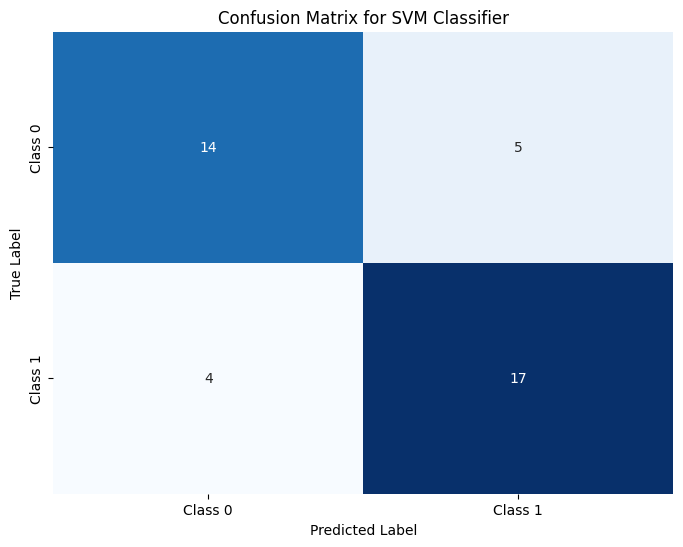

Confusion Matrix visualization complete.


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

print("Confusion Matrix visualization complete.")

## Make Predictions on the Test Set

### Subtask:
Use the trained SVM Classifier to make predictions on the test set.

#### Instructions:
1. Use the `predict` method of the `svm_classifier` on `X_test`.
2. Store the predictions in a variable, for example, `y_pred`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions, I will now write the Python code to make predictions on the test set using the trained SVM classifier.

In [40]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


## Train SVM Classifier

### Subtask:
Initialize and train an SVM Classifier on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with a `kernel='rbf'` (a common choice) and `random_state=42` for reproducibility.
3. Train the classifier on the `X_train` and `y_train` data.
4. Print a confirmation message that the SVM Classifier was trained successfully.

**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the SVM classifier.

In [39]:
from sklearn.svm import SVC

# Initialize an SVM Classifier (SVC) with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

print("SVM Classifier trained successfully.")

SVM Classifier trained successfully.


## Split Data into Training and Testing Sets

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions, I will now write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


# Task
Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification to demonstrate the Confusion Matrix visualization.

**Reasoning**:
I will import `make_classification` and generate a synthetic 2D dataset with 200 samples, 2 features, 2 informative features, and 2 classes, then print the shapes of the features and target to confirm.

In [37]:
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


44.  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

## Make Predictions on the Test Set

### Subtask:
Use the trained SVR model to make predictions on the scaled test set.

#### Instructions:
1. Use the `predict` method of the `svr_regressor` on `X_test_scaled`.
2. Store the predictions in a variable, for example, `y_pred_svr`.
3. Print a confirmation message that predictions have been made.

**Reasoning**:
Following the instructions, I will now write the Python code to make predictions on the scaled test set using the trained SVR model.

In [46]:
# Make predictions on the scaled test set
y_pred_svr = svr_regressor.predict(X_test_scaled)

print("Predictions made on the test set.")

Predictions made on the test set.


## Evaluate Performance using Mean Absolute Error (MAE)

### Subtask:
Evaluate the performance of the SVR model using Mean Absolute Error (MAE).

#### Instructions:
1. Import `mean_absolute_error` from `sklearn.metrics`.
2. Calculate the MAE by comparing `y_test` (true labels) and `y_pred_svr` (predicted values).
3. Print the MAE score, formatted to a few decimal places, along with an appropriate label.

**Reasoning**:
Following the instructions, I will now write the Python code to calculate and print the Mean Absolute Error (MAE) for the SVR model.

In [47]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_svr)

print(f"\nMean Absolute Error (MAE) of the SVR model: {mae:.4f}")


Mean Absolute Error (MAE) of the SVR model: 27.8556


## Train SVR Model

### Subtask:
Initialize and train an SVR model on the scaled training data.

**Reasoning**:
I will import `SVR` from `sklearn.svm`, initialize an `SVR` model (using the default RBF kernel), and train it on the scaled training data. Then, I will print a confirmation message upon successful training.

In [45]:
from sklearn.svm import SVR

# Initialize the SVR model (using default RBF kernel)
svr_regressor = SVR()

# Train the regressor on the scaled training data
svr_regressor.fit(X_train_scaled, y_train)

print("SVR model trained successfully.")

SVR model trained successfully.


## Apply Feature Scaling

### Subtask:
Apply feature scaling using `StandardScaler` to both the training and testing sets.

#### Instructions:
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize `StandardScaler`.
3. Fit the scaler on the training data (`X_train`) and transform both the training (`X_train`) and testing (`X_test`) data.
4. Store the scaled data in `X_train_scaled` and `X_test_scaled`.
5. Print a confirmation message that features were scaled successfully.

**Reasoning**:
Following the instructions in the previous markdown block, I will now write the Python code to scale the features using `StandardScaler`.

In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


## Split Data into Training and Testing Sets

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions, I will now write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


# Task
Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic regression dataset suitable for SVR to demonstrate evaluation using MAE.

**Reasoning**:
I will import `make_regression` and generate a synthetic dataset with 200 samples, 2 features, and a single target, then print the shapes of the features and target to confirm.

In [42]:
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=2, n_informative=2,
                       n_targets=1, noise=10.0, random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

## Make Probability Predictions on the Test Set

### Subtask:
Use the trained Gaussian Naïve Bayes classifier to make probability predictions on the test set.

#### Instructions:
1. Use the `predict_proba` method of the `gnb_classifier` on `X_test`.
2. Store the probability predictions in a variable, for example, `y_pred_proba`.
3. Print a confirmation message that probability predictions have been made.

**Reasoning**:
Following the instructions, I will now write the Python code to make probability predictions on the test set using the trained Gaussian Naïve Bayes classifier. ROC-AUC requires probabilities rather than hard class labels.

In [51]:
# Make probability predictions on the test set
y_pred_proba = gnb_classifier.predict_proba(X_test)

print("Probability predictions made on the test set.")

Probability predictions made on the test set.


## Evaluate Performance using ROC-AUC Score

### Subtask:
Evaluate the performance of the Gaussian Naïve Bayes classifier using the ROC-AUC score.

#### Instructions:
1. Import `roc_auc_score` from `sklearn.metrics`.
2. Calculate the ROC-AUC score by comparing `y_test` (true labels) and the probabilities for the positive class (`y_pred_proba[:, 1]`).
3. Print the ROC-AUC score, formatted to a few decimal places, along with an appropriate label.

**Reasoning**:
Following the instructions, I will now write the Python code to calculate and print the ROC-AUC score for the Gaussian Naïve Bayes classifier.

In [52]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
# For binary classification, we use the probability of the positive class (class 1)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f"\nROC-AUC Score of the Naïve Bayes model: {roc_auc:.4f}")


ROC-AUC Score of the Naïve Bayes model: 0.8872


## Train Naïve Bayes Classifier

### Subtask:
Train a Gaussian Naïve Bayes classifier on the training data.

#### Instructions:
1. Import `GaussianNB` from `sklearn.naive_bayes`.
2. Initialize `GaussianNB` (using default parameters).
3. Train the classifier on the `X_train` and `y_train` data.
4. Print a confirmation message that the Gaussian Naïve Bayes classifier was trained successfully.

**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the Gaussian Naïve Bayes classifier.

In [50]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

print("Gaussian Naïve Bayes Classifier trained successfully.")

Gaussian Naïve Bayes Classifier trained successfully.


## Split Data into Training and Testing Sets

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions, I will now write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


# Task
Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification to demonstrate ROC-AUC evaluation.

**Reasoning**:
I will import `make_classification` and generate a synthetic 2D dataset with 200 samples, 2 features, 2 informative features, and 2 classes, then print the shapes of the features and target to confirm.

In [48]:
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.


## Make Probability Predictions on the Test Set

### Subtask:
Use the trained SVM Classifier to make probability predictions on the test set.

#### Instructions:
1. Ensure the `SVC` estimator is configured to output probabilities (i.e., `probability=True` when initialized).
2. Use the `predict_proba` method of the `svm_classifier` on `X_test`.
3. Store the probability predictions in a variable, for example, `y_pred_proba`.
4. Print a confirmation message that probability predictions have been made.

**Reasoning**:
To calculate the Precision-Recall Curve, I need probability estimates for the positive class. I will make probability predictions on the test set using the trained SVM classifier. Note that for `SVC` to use `predict_proba`, it needs to be initialized with `probability=True`.

In [56]:
svm_classifier.probability = True # Ensure probability estimates are enabled
svm_classifier.fit(X_train, y_train) # Retrain if probability was not set initially

# Make probability predictions on the test set
y_pred_proba = svm_classifier.predict_proba(X_test)

print("Probability predictions made on the test set.")

Probability predictions made on the test set.


## Visualize Precision-Recall Curve

### Subtask:
Visualize the Precision-Recall Curve of the SVM Classifier.

#### Instructions:
1. Import `precision_recall_curve` from `sklearn.metrics`.
2. Import `matplotlib.pyplot` as `plt`.
3. Calculate precision, recall, and thresholds using `precision_recall_curve` with `y_test` and the probabilities of the positive class (`y_pred_proba[:, 1]`).
4. Plot the Precision-Recall curve using `plt.plot`.
5. Add appropriate labels for the x and y axes, a title, and a grid.
6. Display the plot using `plt.show()`.

**Reasoning**:
Following the instructions, I will now write the Python code to calculate and visualize the Precision-Recall Curve using `matplotlib.pyplot`.

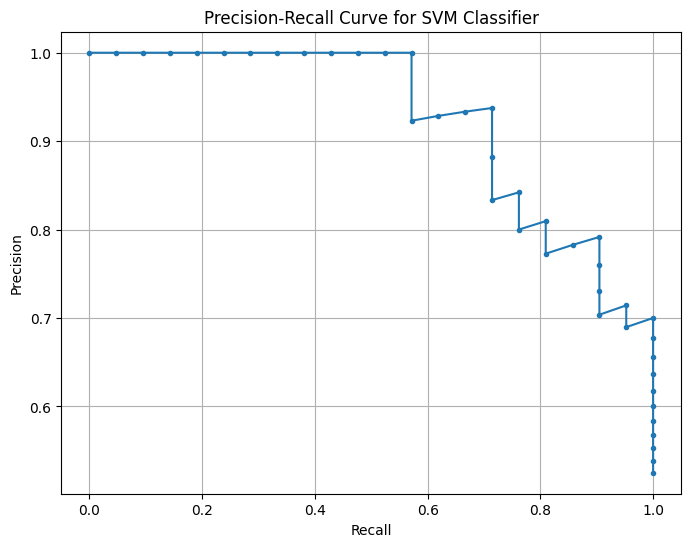

Precision-Recall Curve visualization complete.


In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.grid(True)
plt.show()

print("Precision-Recall Curve visualization complete.")

## Train SVM Classifier

### Subtask:
Initialize and train an SVM Classifier on the training data.

#### Instructions:
1. Import `SVC` from `sklearn.svm`.
2. Initialize an `SVC` classifier with a `kernel='rbf'` (a common choice) and `random_state=42` for reproducibility.
3. Train the classifier on the `X_train` and `y_train` data.
4. Print a confirmation message that the SVM Classifier was trained successfully.

**Reasoning**:
Following the instructions, I will now write the Python code to initialize and train the SVM classifier.

In [55]:
from sklearn.svm import SVC

# Initialize an SVM Classifier (SVC) with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

print("SVM Classifier trained successfully.")

SVM Classifier trained successfully.


## Split Data into Training and Testing Sets

### Subtask:
Split the generated synthetic dataset into training and testing sets.

#### Instructions:
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X` and `y` data into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split`.
3. Use a `test_size` of `0.2` (20% for testing) and `random_state=42` for reproducibility.
4. Print the shapes of the resulting training and testing sets to verify the split.

**Reasoning**:
Following the instructions, I will now write the Python code to perform this split using `train_test_split` and display the shapes of the resulting datasets.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


# Task
Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

## Generate Synthetic Dataset

### Subtask:
Generate a synthetic 2D dataset suitable for binary classification to demonstrate Precision-Recall Curve visualization.

**Reasoning**:
I will import `make_classification` and generate a synthetic 2D dataset with 200 samples, 2 features, 2 informative features, and 2 classes, then print the shapes of the features and target to confirm.

In [53]:
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Print the shapes of X and y to verify
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (200, 2)
Shape of target (y): (200,)
